# Модель для предсказания риска сердечного приступа

Требуется разработать модель машинного обучения, а также подготовить библиотеку и интерфейс к ней для предсказания на тестовой выборке.

Описание данных

**`heart_train.csv`:**

- `Age` (численный) - возраст,
- `Cholesterol` (численный) - холестерин, 
- `Heart rate` (численный) - частота сердцебиения,
- `Diabetes` (категориальный)- наличие диабета,
- `Family History` (категориальный)- наличие семейной истории/наследственности,
- `Smoking` (категориальный) - курит пациент (1) или нет (0),
- `Obesity` (категориальный) - ожирение,
- `Alcohol Consumption` (категориальный) - употребление алкоголя,
- `Exercise Hours Per Week` (численный) - количество часов занятий спортом в неделю,
- `Diet` (категориальный) - тип диеты,
- `Previous Heart Problems` (категориальный) - предыдущие проблемы с сердцем,
- `Medication Use` (категориальный) - принимает ли пациент медикоменты,
- `Stress Level` (категориальный) - уровень стресса по 10 бальной шкале,
- `Sedentary Hours Per Day` (численный) - часы нахождения в сидячем образе жизни в день,
- `Income` (численный) - доход,
- `BMI` (численный) - индекс массы тела,
- `Triglycerides` (численный) - триглицериды,
- `Physical Activity Days Per Week` (категориальный) - количество дней физичиской активности в неделю,
- `Sleep Hours Per Day` (численный) - количество часов сна в день,
- `Heart Attack Risk (Binary)` (категориальный) - риск сердечного приступа,
- `Blood sugar` (численный) - уровень сахара в крови,
- `CK-MB` (численный) - креатинкиназа-МВ,
- `Troponin` (численный) - тропонин,
- `Gender` (категориальный) - пол,
- `Systolic blood pressure` (численный) - систолическое кровяное давление,
- `Diastolic blood pressure` (численный)- диастолическое кровяное давление,
- `id` - персональный номер пациента.


**`heart_test.csv`:**

- `Age` (численный) - возраст,
- `Cholesterol` (численный) - холестерин, 
- `Heart rate` (численный) - частота сердцебиения,
- `Diabetes` (категориальный)- наличие диабета,
- `Family History` (категориальный)- наличие семейной истории/наследственности,
- `Smoking` (категориальный) - курит пациент (1) или нет (0),
- `Obesity` (категориальный) - ожирение,
- `Alcohol Consumption` (категориальный) - употребление алкоголя,
- `Exercise Hours Per Week` (численный) - количество часов занятий спортом в неделю,
- `Diet` (категориальный) - тип диеты,
- `Previous Heart Problems` (категориальный) - предыдущие проблемы с сердцем,
- `Medication Use` (категориальный) - принимает ли пациент медикоменты,
- `Stress Level` (категориальный) - уровень стресса по 10 бальной шкале,
- `Sedentary Hours Per Day` (численный) - часы нахождения в сидячем образе жизни в день,
- `Income` (численный) - доход,
- `BMI` (численный) - индекс массы тела,
- `Triglycerides` (численный) - триглицериды,
- `Physical Activity Days Per Week` (категориальный) - количество дней физичиской активности в неделю,
- `Sleep Hours Per Day` (численный) - количество часов сна в день,
- `Blood sugar` (численный) - уровень сахара в крови,
- `CK-MB` (численный) - креатинкиназа-МВ,
- `Troponin` (численный) - тропонин,
- `Gender` (категориальный) - пол,
- `Systolic blood pressure` (численный) - систолическое кровяное давление,
- `Diastolic blood pressure` (численный)- диастолическое кровяное давление,
- `id` - персональный номер пациента.

In [95]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_predict
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, f1_score, make_scorer, precision_score, recall_score, classification_report, precision_recall_curve, accuracy_score
from phik import phik_matrix

RANDOM_STATE = 42

In [2]:
import os
os.chdir(r'C:\Users\osnov\OneDrive\Рабочий стол\science\DATA SC\Проекты\Мастерская')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
heart_train = pd.read_csv('heart_train.csv', index_col=0)
heart_test = pd.read_csv('heart_test.csv', index_col=0)

In [5]:
# просмотрим файл heart_train

heart_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8685 entries, 0 to 8684
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8685 non-null   float64
 1   Cholesterol                      8685 non-null   float64
 2   Heart rate                       8685 non-null   float64
 3   Diabetes                         8442 non-null   float64
 4   Family History                   8442 non-null   float64
 5   Smoking                          8442 non-null   float64
 6   Obesity                          8442 non-null   float64
 7   Alcohol Consumption              8442 non-null   float64
 8   Exercise Hours Per Week          8685 non-null   float64
 9   Diet                             8685 non-null   int64  
 10  Previous Heart Problems          8442 non-null   float64
 11  Medication Use                   8442 non-null   float64
 12  Stress Level             

In [6]:
heart_train.head(19)

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0.359551,0.732143,0.074244,1.0,1.0,1.0,1.0,1.0,0.535505,1,1.0,0.0,8.0,0.225704,0.105948,0.459176,0.979221,3.0,0.333333,0.0,0.227018,0.048229,0.036512,Male,0.212903,0.709302,2664
1,0.202247,0.325000,0.047663,1.0,1.0,0.0,0.0,1.0,0.068690,2,1.0,0.0,9.0,0.289923,0.164217,0.117053,0.515584,3.0,0.833333,0.0,0.150198,0.017616,0.000194,Female,0.412903,0.569767,9287
2,0.606742,0.860714,0.055912,1.0,0.0,1.0,1.0,1.0,0.944001,2,1.0,1.0,6.0,0.550133,0.598745,0.373574,0.012987,2.0,1.000000,0.0,0.227018,0.048229,0.036512,Female,0.238710,0.220930,5379
3,0.730337,0.007143,0.053162,0.0,0.0,1.0,0.0,1.0,0.697023,0,0.0,1.0,3.0,0.330962,0.077605,0.049735,0.131169,0.0,0.333333,1.0,0.227018,0.048229,0.036512,Female,0.348387,0.267442,8222
4,0.775281,0.757143,0.021998,0.0,0.0,1.0,0.0,1.0,0.412878,1,0.0,0.0,8.0,0.524600,0.341960,0.830405,0.070130,5.0,1.000000,1.0,0.227018,0.048229,0.036512,Male,0.619355,0.441860,4047
5,0.168539,0.764286,0.057745,0.0,1.0,1.0,1.0,1.0,0.082682,1,1.0,0.0,7.0,0.558262,0.640836,0.110571,0.238961,6.0,0.833333,0.0,0.227018,0.048229,0.036512,Male,0.464516,0.418605,5817
6,0.483146,0.021429,0.036664,1.0,0.0,1.0,0.0,1.0,0.540206,2,0.0,1.0,9.0,0.827611,0.774609,0.073718,0.072727,5.0,0.000000,1.0,0.231225,0.008940,0.000291,Male,0.361290,0.569767,5580
7,0.235955,0.939286,0.081577,1.0,0.0,1.0,0.0,1.0,0.290837,2,0.0,1.0,7.0,0.225275,0.999364,0.001534,0.180519,4.0,0.000000,0.0,0.227018,0.048229,0.036512,Male,0.690323,0.639535,4963
8,0.685393,0.317857,0.039413,0.0,0.0,1.0,0.0,0.0,0.803160,0,1.0,1.0,3.0,0.828176,0.142208,0.093073,0.990909,6.0,0.166667,1.0,0.126482,0.002332,0.007185,Male,0.664516,0.616279,4521
9,0.213483,0.796429,0.076994,1.0,1.0,1.0,1.0,0.0,0.506971,1,0.0,0.0,7.0,0.692973,0.820952,0.145447,0.171429,3.0,1.000000,0.0,0.227018,0.048229,0.036512,Male,0.651613,0.720930,2455


Наблюдаем 28 столбцов.
Пропуски в столбцах:
- `Diabetes`
- `Family History`
- `Smoking`
- `Obesity`
- `Alcohol Consumption`
- `Previous Heart Problems`
- `Medication Use`
- `Stress Level`
- `Physical Activity Days Per Week`

Бинарные признаки имеют тип float64, скорее всего это вызвано наличием пропусков. Приведем их к типу int64. К этому относятся вышеупомянутые колонки и:
- `Heart Attack Risk (Binary)`

In [7]:
# просмотрим файл heart_test

heart_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 966 entries, 0 to 965
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              966 non-null    float64
 1   Cholesterol                      966 non-null    float64
 2   Heart rate                       966 non-null    float64
 3   Diabetes                         935 non-null    float64
 4   Family History                   935 non-null    float64
 5   Smoking                          935 non-null    float64
 6   Obesity                          935 non-null    float64
 7   Alcohol Consumption              935 non-null    float64
 8   Exercise Hours Per Week          966 non-null    float64
 9   Diet                             966 non-null    int64  
 10  Previous Heart Problems          935 non-null    float64
 11  Medication Use                   935 non-null    float64
 12  Stress Level               

In [8]:
heart_test.head(15)

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0.494382,0.264286,0.062328,0.0,1.0,1.0,1.0,1.0,0.361618,2,0.0,0.0,8.0,0.194370,0.587759,0.283490,0.306494,1.0,0.333333,0.227018,0.048229,0.036512,Male,0.283871,0.372093,7746
1,0.224719,0.953571,0.082493,1.0,0.0,0.0,1.0,0.0,0.996483,2,1.0,1.0,5.0,0.329888,0.602883,0.467036,0.087013,0.0,0.166667,0.227018,0.048229,0.036512,Female,0.703226,0.441860,4202
2,0.629213,0.092857,0.064161,0.0,1.0,1.0,1.0,0.0,0.995561,0,0.0,0.0,10.0,0.780075,0.370436,0.409366,0.205195,7.0,1.000000,0.102767,0.002666,0.088455,Male,0.458065,0.779070,6632
3,0.460674,0.567857,0.055912,1.0,1.0,1.0,1.0,1.0,0.437277,0,0.0,0.0,10.0,0.785071,0.368242,0.910261,0.163636,0.0,0.666667,0.203557,0.056390,0.271774,Female,0.741935,0.255814,4639
4,0.719101,0.485714,0.022915,1.0,0.0,1.0,0.0,1.0,0.514920,0,0.0,0.0,7.0,0.070919,0.729578,0.758924,0.580519,5.0,0.000000,0.227018,0.048229,0.036512,Male,0.412903,0.395349,4825
5,0.561798,0.792857,0.026581,1.0,1.0,1.0,1.0,0.0,0.774470,2,0.0,1.0,8.0,0.044114,0.813517,0.723416,0.362338,1.0,0.666667,0.227018,0.048229,0.036512,Male,0.161290,0.593023,1076
6,0.674157,0.853571,0.019248,1.0,1.0,1.0,0.0,1.0,0.149123,1,0.0,0.0,8.0,0.305998,0.562542,0.696128,0.211688,3.0,0.000000,0.227018,0.048229,0.036512,Male,0.535484,0.546512,5020
7,0.539326,0.335714,0.036664,1.0,1.0,1.0,0.0,1.0,0.329720,1,1.0,0.0,1.0,0.377016,0.235091,0.484368,0.835065,7.0,0.666667,0.695652,0.002466,0.000874,Male,0.496774,0.662791,4267
8,0.449438,0.328571,0.075160,1.0,0.0,1.0,0.0,0.0,0.487405,2,1.0,0.0,10.0,0.089371,0.486634,0.409407,0.819481,2.0,0.166667,0.227018,0.048229,0.036512,Male,0.677419,0.430233,4003
9,0.617978,0.728571,0.032081,0.0,1.0,1.0,0.0,0.0,0.211485,2,1.0,1.0,8.0,0.524318,0.083936,0.657387,0.196104,0.0,1.000000,0.227018,0.048229,0.036512,Male,0.722581,0.255814,2519


Наблюдаем 27 столбцов. Столбцы одинаковые за исключением отсутствия `Heart Attack Risk (Binary)`
Пропуски в столбцах:
- `Diabetes`
- `Family History`
- `Smoking`
- `Obesity`
- `Alcohol Consumption`
- `Previous Heart Problems`
- `Medication Use`
- `Stress Level`
- `Physical Activity Days Per Week`

**Вывод:** Были изучены два датасета тестовый и тренировочный. Данные уже нормализованы. В тренировочном датасете целевой признак находится в столбце `Heart Attack Risk (Binary)`.

Обнаружены пропуски в следующих столбцах:
- `Diabetes`
- `Family History`
- `Smoking`
- `Obesity`
- `Alcohol Consumption`
- `Previous Heart Problems`
- `Medication Use`
- `Stress Level`
- `Physical Activity Days Per Week`

Присутствуют явные пропуски, исследуем их дальше.

Необходимо привести столбцы к единому формату во всех файлах.

Типы данных имеют корректный вид, но выше упомянутые колонки вместе с `Heart Attack Risk (Binary)` следует привести к int64.

# 2. Предобработка данных

In [9]:
# приведем названия столбцов к единому формату

def col_transfrom(df):
    df.columns = df.columns.str.replace(' ', '_').str.lower()

In [10]:
col_transfrom(heart_train)
col_transfrom(heart_test)

In [11]:
heart_test.columns

Index(['age', 'cholesterol', 'heart_rate', 'diabetes', 'family_history',
       'smoking', 'obesity', 'alcohol_consumption', 'exercise_hours_per_week',
       'diet', 'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides',
       'physical_activity_days_per_week', 'sleep_hours_per_day', 'blood_sugar',
       'ck-mb', 'troponin', 'gender', 'systolic_blood_pressure',
       'diastolic_blood_pressure', 'id'],
      dtype='object')

In [12]:
heart_train.columns

Index(['age', 'cholesterol', 'heart_rate', 'diabetes', 'family_history',
       'smoking', 'obesity', 'alcohol_consumption', 'exercise_hours_per_week',
       'diet', 'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides',
       'physical_activity_days_per_week', 'sleep_hours_per_day',
       'heart_attack_risk_(binary)', 'blood_sugar', 'ck-mb', 'troponin',
       'gender', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'id'],
      dtype='object')

In [13]:
# изучим датасет heart_tain. Посмотрим на столбик Gender

heart_train['gender'].unique()

array(['Male', 'Female', '1.0', '0.0'], dtype=object)

In [14]:
heart_train[heart_train['gender'].isin(['1.0', '0.0'])]

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk_(binary),blood_sugar,ck-mb,troponin,gender,systolic_blood_pressure,diastolic_blood_pressure,id
16,0.449438,0.49978,0.063245,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.233202,0.026692,0.000777,1.0,0.393548,0.255814,9528
90,0.370787,0.49978,0.066911,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.154150,0.004702,0.042043,1.0,0.258065,0.337209,9640
92,0.629213,0.49978,0.073327,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.256917,0.012310,0.000777,0.0,0.258065,0.232558,9515
185,0.516854,0.49978,0.045830,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.559289,0.006704,0.000291,0.0,0.174194,0.151163,9491
188,0.269663,0.49978,0.035747,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.112648,0.051218,0.000485,0.0,0.225806,0.162791,9448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,0.719101,0.49978,0.049496,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.138340,0.004034,0.003204,1.0,0.548387,0.558140,9455
8509,0.651685,0.49978,0.036664,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.239130,0.055790,0.060783,1.0,0.729032,0.779070,9506
8536,0.651685,0.49978,0.054079,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.276680,0.008673,0.150403,1.0,0.606452,0.790698,9474
8619,0.606742,0.49978,0.059578,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.156126,0.057692,0.000583,0.0,0.387097,0.500000,9467


In [15]:
# изучим количество пропусков в heart_train
heart_train.isna().sum()

age                                  0
cholesterol                          0
heart_rate                           0
diabetes                           243
family_history                     243
smoking                            243
obesity                            243
alcohol_consumption                243
exercise_hours_per_week              0
diet                                 0
previous_heart_problems            243
medication_use                     243
stress_level                       243
sedentary_hours_per_day              0
income                               0
bmi                                  0
triglycerides                        0
physical_activity_days_per_week    243
sleep_hours_per_day                  0
heart_attack_risk_(binary)           0
blood_sugar                          0
ck-mb                                0
troponin                             0
gender                               0
systolic_blood_pressure              0
diastolic_blood_pressure 

In [16]:
rows_miss = heart_train.isna().any(axis=1).sum()
precent_miss = (rows_miss/len(heart_train))*100
print(f'Процент строк с пропусками:{precent_miss:.2f}%')

Процент строк с пропусками:2.80%


In [17]:
# изучим количество пропусков в heart_test
heart_test.isna().sum()

age                                 0
cholesterol                         0
heart_rate                          0
diabetes                           31
family_history                     31
smoking                            31
obesity                            31
alcohol_consumption                31
exercise_hours_per_week             0
diet                                0
previous_heart_problems            31
medication_use                     31
stress_level                       31
sedentary_hours_per_day             0
income                              0
bmi                                 0
triglycerides                       0
physical_activity_days_per_week    31
sleep_hours_per_day                 0
blood_sugar                         0
ck-mb                               0
troponin                            0
gender                              0
systolic_blood_pressure             0
diastolic_blood_pressure            0
id                                  0
dtype: int64

In [18]:
rows_miss = heart_test.isna().any(axis=1).sum()
precent_miss = (rows_miss/len(heart_train))*100
print(f'Процент строк с пропусками:{precent_miss:.2f}%')

Процент строк с пропусками:0.36%


В датасетах явные пропуски составляют 2.8% и 0.36% соответственно. Это незначительная часть данных, которое не повлияет на исследование. Удалим пропуски.

In [19]:
heart_train = heart_train.dropna()
heart_test = heart_test.dropna()

In [20]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8442 entries, 0 to 8684
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              8442 non-null   float64
 1   cholesterol                      8442 non-null   float64
 2   heart_rate                       8442 non-null   float64
 3   diabetes                         8442 non-null   float64
 4   family_history                   8442 non-null   float64
 5   smoking                          8442 non-null   float64
 6   obesity                          8442 non-null   float64
 7   alcohol_consumption              8442 non-null   float64
 8   exercise_hours_per_week          8442 non-null   float64
 9   diet                             8442 non-null   int64  
 10  previous_heart_problems          8442 non-null   float64
 11  medication_use                   8442 non-null   float64
 12  stress_level             

In [21]:
heart_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 935 entries, 0 to 965
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              935 non-null    float64
 1   cholesterol                      935 non-null    float64
 2   heart_rate                       935 non-null    float64
 3   diabetes                         935 non-null    float64
 4   family_history                   935 non-null    float64
 5   smoking                          935 non-null    float64
 6   obesity                          935 non-null    float64
 7   alcohol_consumption              935 non-null    float64
 8   exercise_hours_per_week          935 non-null    float64
 9   diet                             935 non-null    int64  
 10  previous_heart_problems          935 non-null    float64
 11  medication_use                   935 non-null    float64
 12  stress_level               

In [22]:
heart_train['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [23]:
# приведем указанные колонки к верному типу данных в heart_train

convert_col = [
    'diabetes',
    'family_history',
    'smoking',
    'obesity',
    'alcohol_consumption',
    'previous_heart_problems',
    'medication_use',
    'heart_attack_risk_(binary)',
    'stress_level',
    'physical_activity_days_per_week'
]


In [24]:
for col in convert_col:
    heart_train[col] = heart_train[col].astype('int64')

In [25]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8442 entries, 0 to 8684
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              8442 non-null   float64
 1   cholesterol                      8442 non-null   float64
 2   heart_rate                       8442 non-null   float64
 3   diabetes                         8442 non-null   int64  
 4   family_history                   8442 non-null   int64  
 5   smoking                          8442 non-null   int64  
 6   obesity                          8442 non-null   int64  
 7   alcohol_consumption              8442 non-null   int64  
 8   exercise_hours_per_week          8442 non-null   float64
 9   diet                             8442 non-null   int64  
 10  previous_heart_problems          8442 non-null   int64  
 11  medication_use                   8442 non-null   int64  
 12  stress_level             

In [26]:
heart_train.head()

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk_(binary),blood_sugar,ck-mb,troponin,gender,systolic_blood_pressure,diastolic_blood_pressure,id
0,0.359551,0.732143,0.074244,1,1,1,1,1,0.535505,1,1,0,8,0.225704,0.105948,0.459176,0.979221,3,0.333333,0,0.227018,0.048229,0.036512,Male,0.212903,0.709302,2664
1,0.202247,0.325000,0.047663,1,1,0,0,1,0.068690,2,1,0,9,0.289923,0.164217,0.117053,0.515584,3,0.833333,0,0.150198,0.017616,0.000194,Female,0.412903,0.569767,9287
2,0.606742,0.860714,0.055912,1,0,1,1,1,0.944001,2,1,1,6,0.550133,0.598745,0.373574,0.012987,2,1.000000,0,0.227018,0.048229,0.036512,Female,0.238710,0.220930,5379
3,0.730337,0.007143,0.053162,0,0,1,0,1,0.697023,0,0,1,3,0.330962,0.077605,0.049735,0.131169,0,0.333333,1,0.227018,0.048229,0.036512,Female,0.348387,0.267442,8222
4,0.775281,0.757143,0.021998,0,0,1,0,1,0.412878,1,0,0,8,0.524600,0.341960,0.830405,0.070130,5,1.000000,1,0.227018,0.048229,0.036512,Male,0.619355,0.441860,4047


In [27]:
# приведем указанные колонки к верному типу данных в heart_test

convert_col = [
    'diabetes',
    'family_history',
    'smoking',
    'obesity',
    'alcohol_consumption',
    'previous_heart_problems',
    'medication_use',
    'stress_level',
    'physical_activity_days_per_week'
]

In [28]:
for col in convert_col:
    heart_test[col] = heart_test[col].astype('int64')

In [29]:
heart_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 935 entries, 0 to 965
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              935 non-null    float64
 1   cholesterol                      935 non-null    float64
 2   heart_rate                       935 non-null    float64
 3   diabetes                         935 non-null    int64  
 4   family_history                   935 non-null    int64  
 5   smoking                          935 non-null    int64  
 6   obesity                          935 non-null    int64  
 7   alcohol_consumption              935 non-null    int64  
 8   exercise_hours_per_week          935 non-null    float64
 9   diet                             935 non-null    int64  
 10  previous_heart_problems          935 non-null    int64  
 11  medication_use                   935 non-null    int64  
 12  stress_level               

In [30]:
heart_test.head()

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,blood_sugar,ck-mb,troponin,gender,systolic_blood_pressure,diastolic_blood_pressure,id
0,0.494382,0.264286,0.062328,0,1,1,1,1,0.361618,2,0,0,8,0.194370,0.587759,0.283490,0.306494,1,0.333333,0.227018,0.048229,0.036512,Male,0.283871,0.372093,7746
1,0.224719,0.953571,0.082493,1,0,0,1,0,0.996483,2,1,1,5,0.329888,0.602883,0.467036,0.087013,0,0.166667,0.227018,0.048229,0.036512,Female,0.703226,0.441860,4202
2,0.629213,0.092857,0.064161,0,1,1,1,0,0.995561,0,0,0,10,0.780075,0.370436,0.409366,0.205195,7,1.000000,0.102767,0.002666,0.088455,Male,0.458065,0.779070,6632
3,0.460674,0.567857,0.055912,1,1,1,1,1,0.437277,0,0,0,10,0.785071,0.368242,0.910261,0.163636,0,0.666667,0.203557,0.056390,0.271774,Female,0.741935,0.255814,4639
4,0.719101,0.485714,0.022915,1,0,1,0,1,0.514920,0,0,0,7,0.070919,0.729578,0.758924,0.580519,5,0.000000,0.227018,0.048229,0.036512,Male,0.412903,0.395349,4825


In [31]:
# изучим дубликаты в датасетах

print('Количество дублей в heart_train:', heart_train.duplicated().sum())
print('Количество дублей в heart_test:', heart_test.duplicated().sum())

Количество дублей в heart_train: 0
Количество дублей в heart_test: 0


**Вывод:** Была проведена предобработка данных. Были исправлены написания колонок и приведены к единому стилю. Дубликатов не обнаружено.
Также были удалены строчки с пропусками в данных.

# 3. Исследовательский анализ данных

In [32]:
#иузчим датасет heart_train

heart_train.describe()

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk_(binary),blood_sugar,ck-mb,troponin,systolic_blood_pressure,diastolic_blood_pressure,id
count,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000
mean,0.449008,0.501108,0.050194,0.652097,0.489576,0.902867,0.498342,0.601990,0.503415,1.001540,0.495380,0.501185,5.493367,0.499142,0.496089,0.496831,0.505539,3.508292,0.503712,0.356906,0.227998,0.047745,0.036867,0.451955,0.501672,4696.392087
std,0.232809,0.288785,0.018442,0.476333,0.499921,0.296157,0.500027,0.489517,0.288881,0.812981,0.500008,0.500028,2.867862,0.289418,0.288767,0.286599,0.290412,2.281772,0.332749,0.479115,0.074623,0.070399,0.059284,0.170187,0.170302,2704.773301
min,0.044944,0.000000,0.018332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161290,0.209302,1.000000
25%,0.247191,0.260714,0.034830,0.000000,0.000000,1.000000,0.000000,0.000000,0.253359,0.000000,0.000000,0.000000,3.000000,0.247650,0.244591,0.247935,0.257143,2.000000,0.166667,0.000000,0.227018,0.048229,0.036512,0.303226,0.348837,2359.250000
50%,0.460674,0.496429,0.050412,1.000000,0.000000,1.000000,0.000000,1.000000,0.508244,1.000000,0.000000,1.000000,5.000000,0.492734,0.496052,0.490801,0.507792,3.000000,0.500000,0.000000,0.227018,0.048229,0.036512,0.451613,0.500000,4694.500000
75%,0.640449,0.750000,0.065995,1.000000,1.000000,1.000000,1.000000,1.000000,0.754901,2.000000,1.000000,1.000000,8.000000,0.751047,0.747603,0.744399,0.758442,6.000000,0.833333,1.000000,0.227018,0.048229,0.036512,0.600000,0.651163,7030.750000
max,0.853933,1.000000,0.082493,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.741935,0.790698,9376.000000


Просмотрев сводную статистику всех числовых столбцов датасета можно сказать, что явные аномалии отсутвствуют.

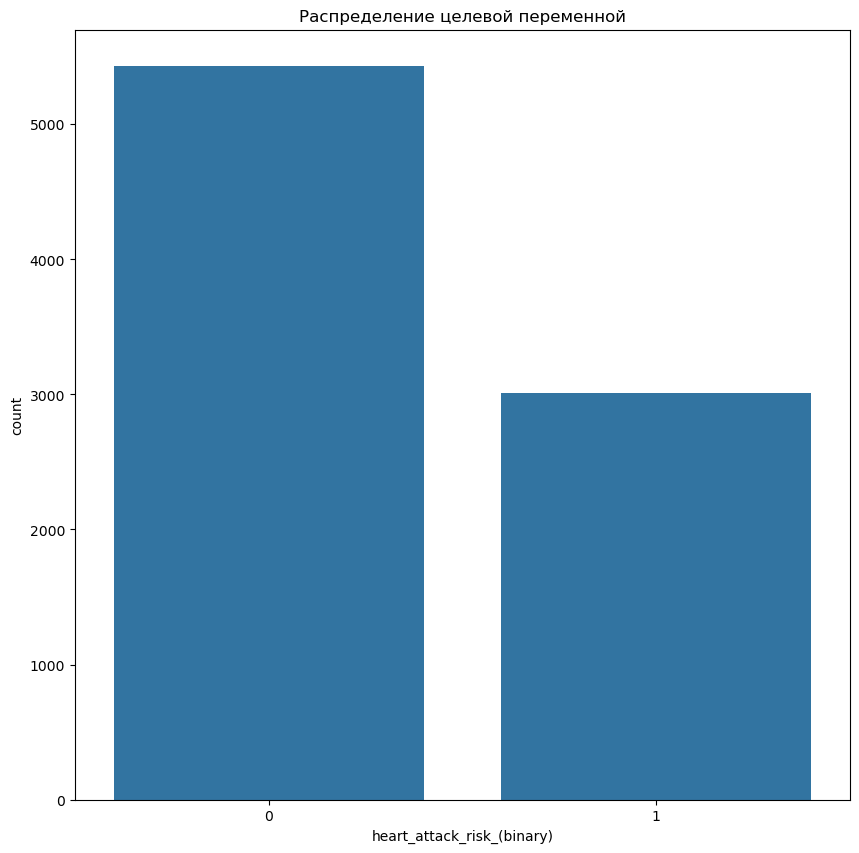

In [33]:
#посмотрим на целевую переменную 

plt.figure(figsize=(10, 10))
sns.countplot(x='heart_attack_risk_(binary)', data=heart_train)
plt.title('Распределение целевой переменной')
plt.show()

In [34]:
heart_train['heart_attack_risk_(binary)'].value_counts(normalize=True)

heart_attack_risk_(binary)
0    0.643094
1    0.356906
Name: proportion, dtype: float64

Класс 0 (нет риска) соостволяет 64.3%.

Дисбаланс присутствует, но умеренный. Миноритарный класс (риск присутствует) составляет 35.7%, что достаточно для обучения модели без обязательной балансировки.

При обучении сначала попробуем модель без балансировки и проверим метрики. 

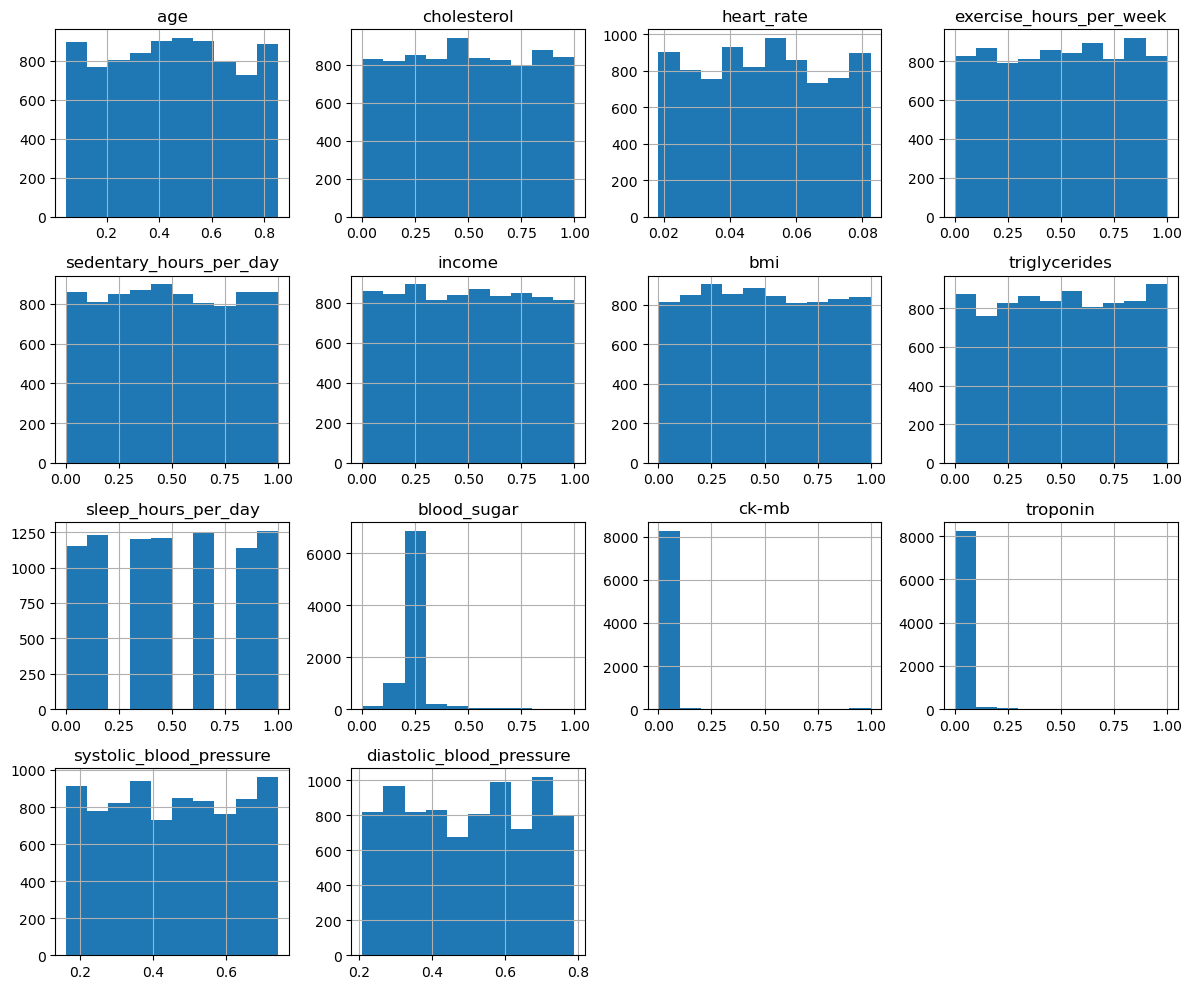

In [35]:
#изучим числовые признаки heart_train
numeric_cols = [
    'age',
    'cholesterol',
    'heart_rate',
    'exercise_hours_per_week',
    'sedentary_hours_per_day',
    'income', 
    'bmi',
    'triglycerides',
    'sleep_hours_per_day',
    'blood_sugar',
    'ck-mb',
    'troponin',
    'systolic_blood_pressure',
    'diastolic_blood_pressure'
]
heart_train[numeric_cols].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

Данные предоставленны в нормализованном виде. Но некоторые признаки имеют аномальные значения.

Например сахар в крови. Большинство пациентов имеет стандартные значения показателя, что видно на графике. А уже отклонения от нормы свидетельствуют о наличии проблем. 

In [36]:
#изучим категориальные признаки heart_train

def diagram(data, column, title, xlabel, ylabel):
    all = len(data)
    data_groupby = data.groupby(column).size()/all
    data_groupby_sort = data_groupby.sort_values()
    mm = data_groupby_sort.plot(kind='barh', figsize=(8, 6))
    plt.title(f'{title}', fontsize=12)
    plt.xlabel(f'{xlabel}', fontsize=12)
    plt.ylabel(f'{ylabel}', fontsize=12)

    percent = dict(data_groupby_sort)
    row = 0
    i = 0
    for row in percent:
        mm.text(percent[row]-0.09, i, str(round(percent[row]*100, 2)) + '%',
                      fontsize = 'large', fontweight='bold', color='white')
        i += 1

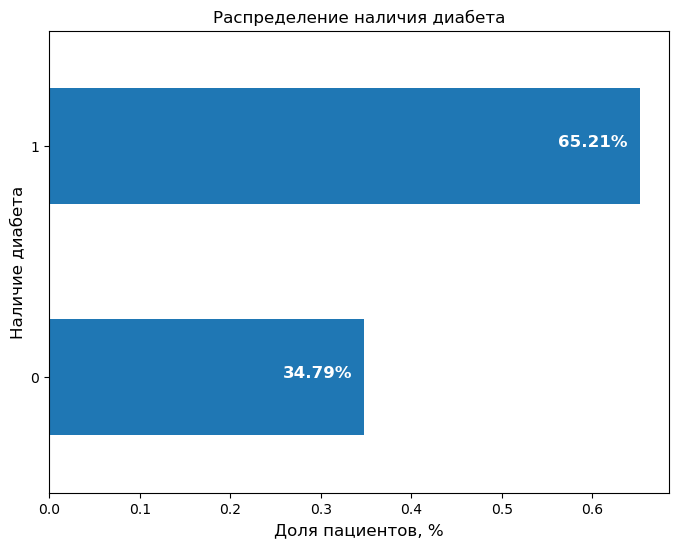

In [37]:
data = heart_train
column = 'diabetes'
title = 'Распределение наличия диабета'
xlabel = 'Доля пациентов, %'
ylabel = 'Наличие диабета'
diagram(data, column, title, xlabel, ylabel)

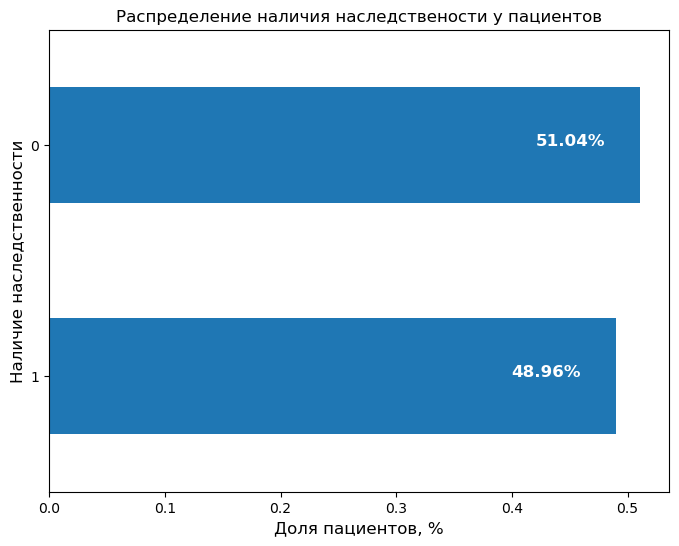

In [38]:
data = heart_train
column = 'family_history'
title = 'Распределение наличия наследствености у пациентов'
xlabel = 'Доля пациентов, %'
ylabel = 'Наличие наследственности'
diagram(data, column, title, xlabel, ylabel)

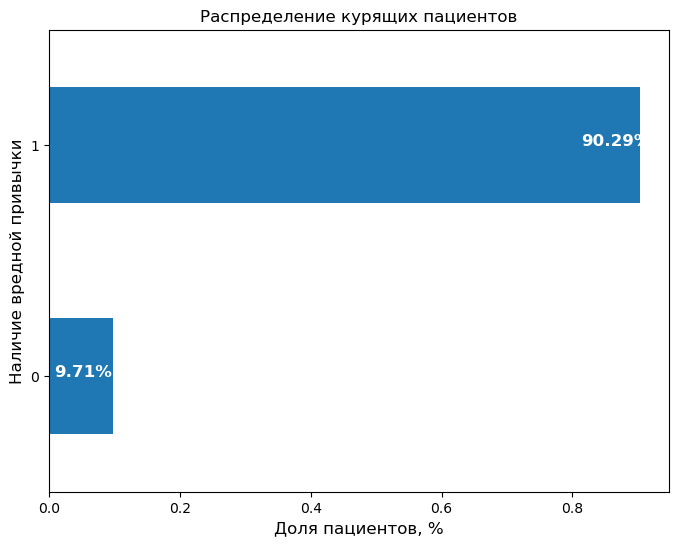

In [39]:
data = heart_train
column = 'smoking'
title = 'Распределение курящих пациентов'
xlabel = 'Доля пациентов, %'
ylabel = 'Наличие вредной привычки'
diagram(data, column, title, xlabel, ylabel)

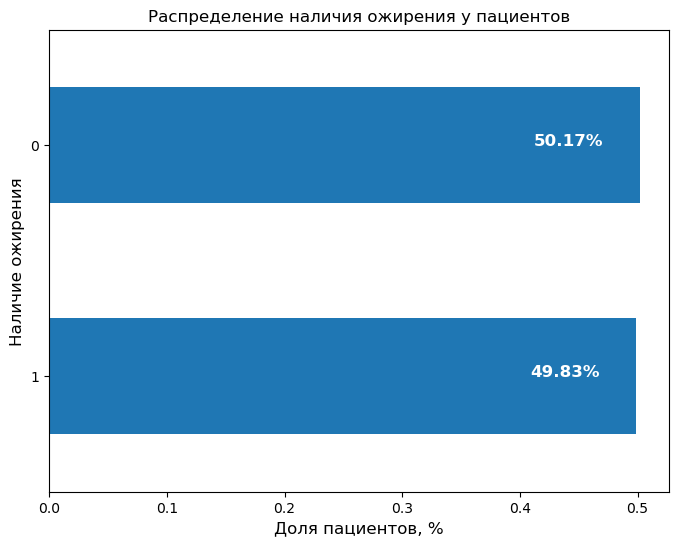

In [40]:
data = heart_train
column = 'obesity'
title = 'Распределение наличия ожирения у пациентов'
xlabel = 'Доля пациентов, %'
ylabel = 'Наличие ожирения'
diagram(data, column, title, xlabel, ylabel)

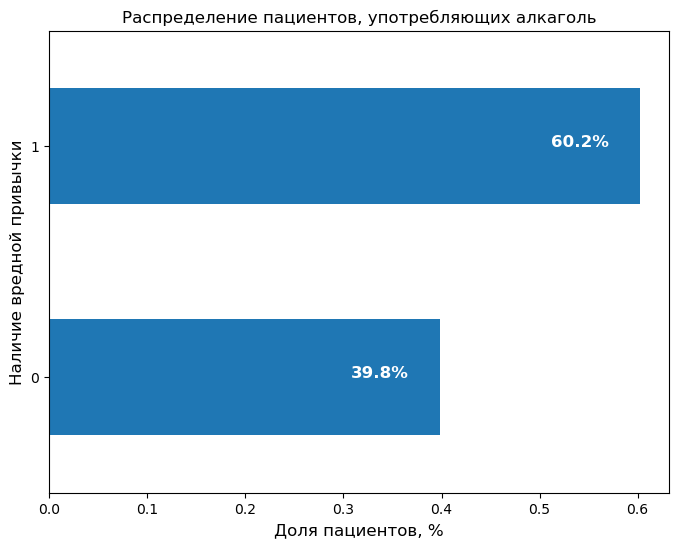

In [41]:
data = heart_train
column = 'alcohol_consumption'
title = 'Распределение пациентов, употребляющих алкаголь'
xlabel = 'Доля пациентов, %'
ylabel = 'Наличие вредной привычки'
diagram(data, column, title, xlabel, ylabel)

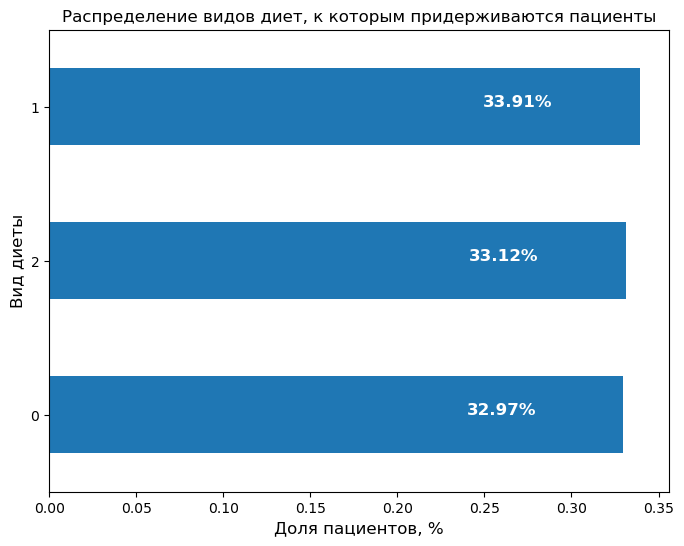

In [42]:
data = heart_train
column = 'diet'
title = 'Распределение видов диет, к которым придерживаются пациенты'
xlabel = 'Доля пациентов, %'
ylabel = 'Вид диеты'
diagram(data, column, title, xlabel, ylabel)

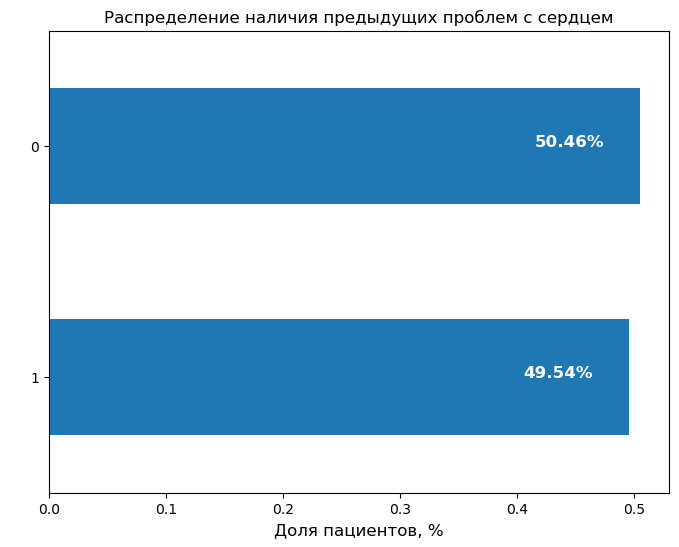

In [43]:
data = heart_train
column = 'previous_heart_problems'
title = 'Распределение наличия предыдущих проблем с сердцем'
xlabel = 'Доля пациентов, %'
ylabel = ' '
diagram(data, column, title, xlabel, ylabel)

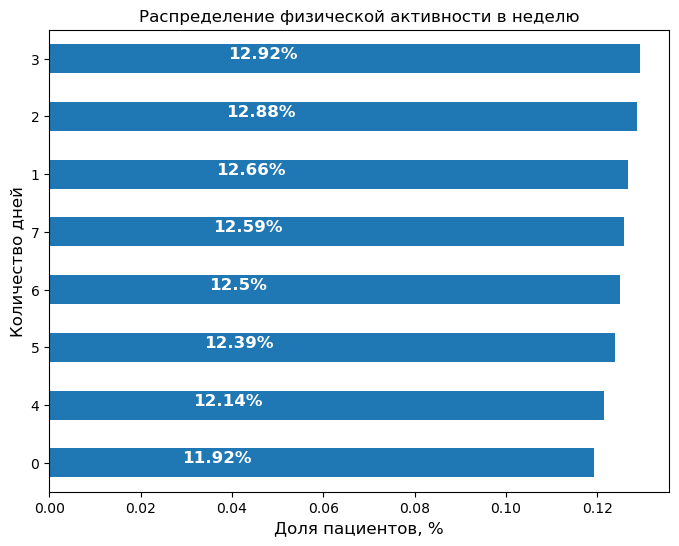

In [44]:
data = heart_train
column = 'physical_activity_days_per_week'
title = 'Распределение физической активности в неделю'
xlabel = 'Доля пациентов, %'
ylabel = 'Количество дней'
diagram(data, column, title, xlabel, ylabel)

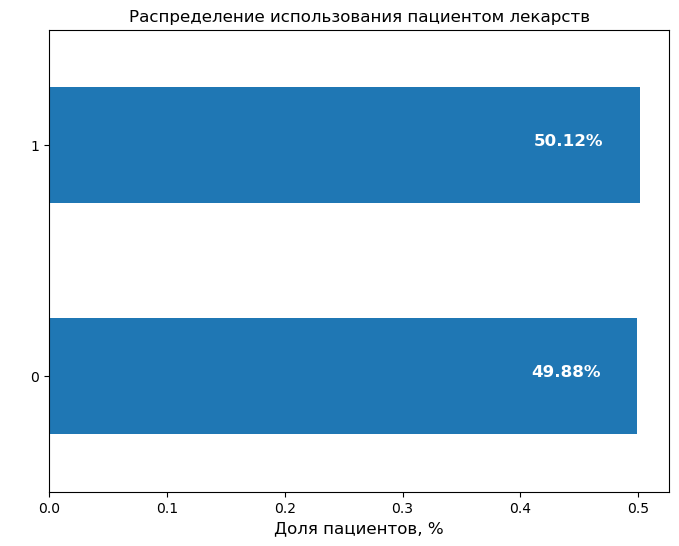

In [45]:
data = heart_train
column = 'medication_use'
title = 'Распределение использования пациентом лекарств'
xlabel = 'Доля пациентов, %'
ylabel = ' '
diagram(data, column, title, xlabel, ylabel)

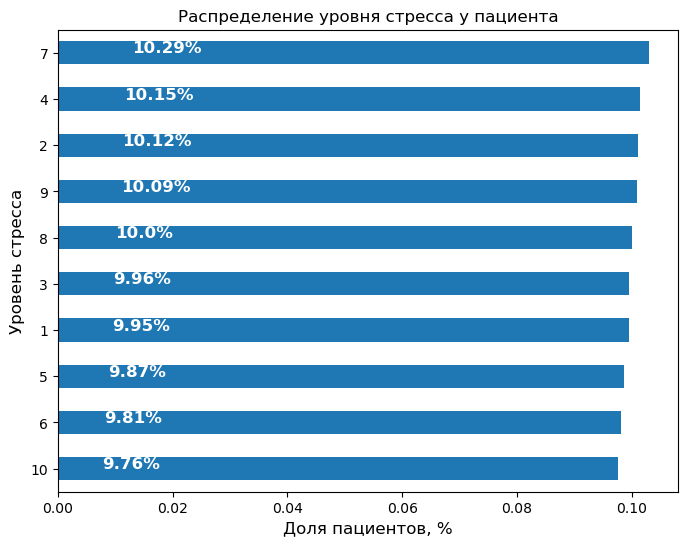

In [46]:
data = heart_train
column = 'stress_level'
title = 'Распределение уровня стресса у пациента'
xlabel = 'Доля пациентов, %'
ylabel = 'Уровень стресса'
diagram(data, column, title, xlabel, ylabel)

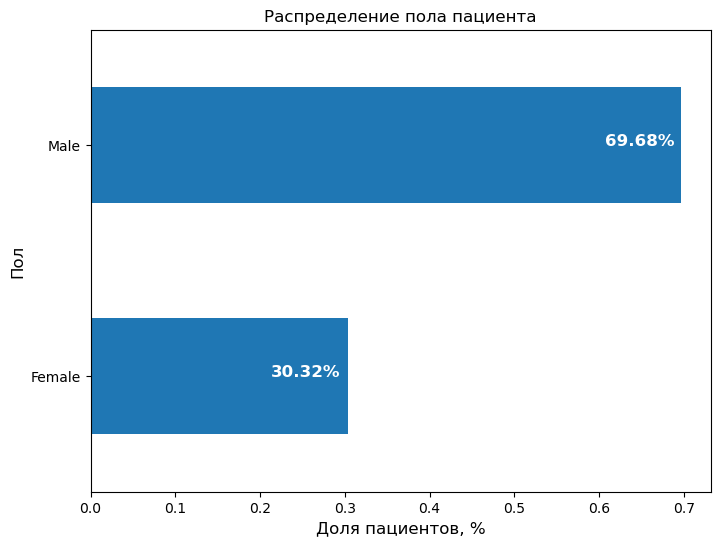

In [47]:
data = heart_train
column = 'gender'
title = 'Распределение пола пациента'
xlabel = 'Доля пациентов, %'
ylabel = 'Пол'
diagram(data, column, title, xlabel, ylabel)

Изучив все графики можно сказать, что большинство категориальных признаков распределены одинаково. Однако, стоит отметить следующее:

У большинства пациентов имеется диабет (65.2%). Подавляющее большинство пациентов курит. 60% употребляет алкоголь. Почти 70% пациентов - мужчины.

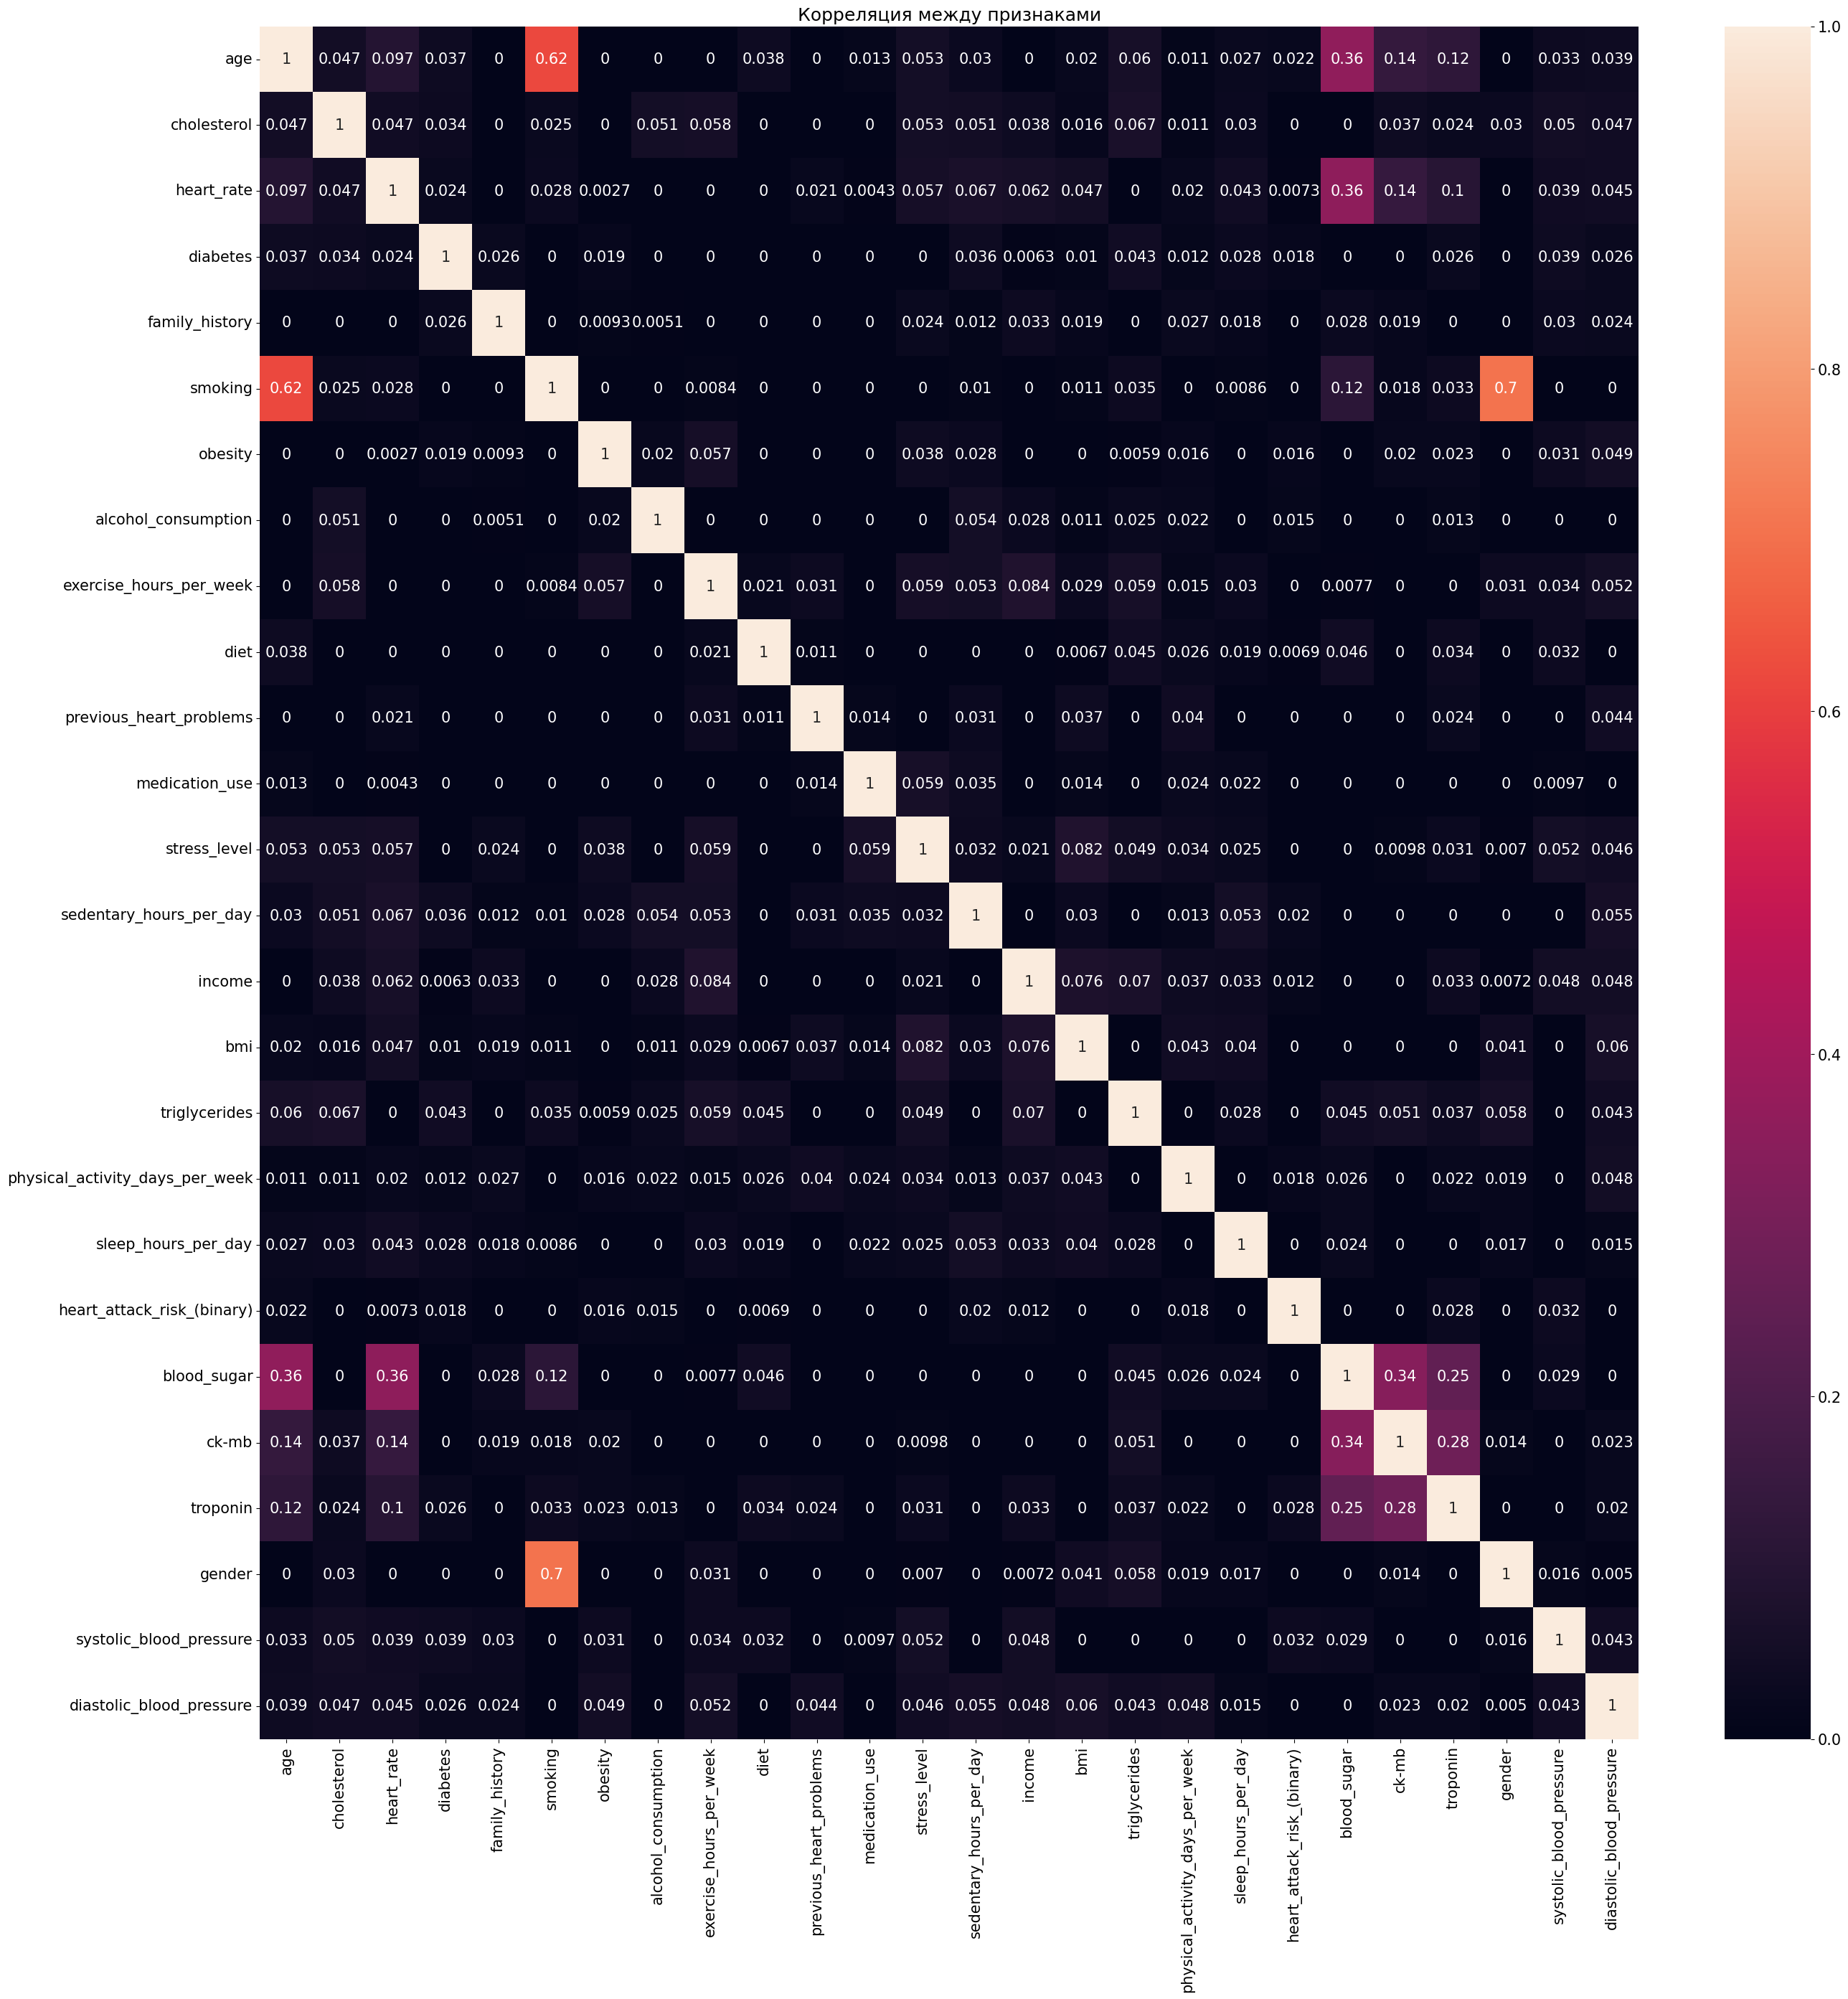

In [48]:
#построим кор. матрицу для heart_train

data = heart_train[heart_train.columns[heart_train.columns != 'id']]
all_features = list(data.columns)
corr = data[all_features].phik_matrix(interval_cols = [
     'age',
    'cholesterol',
    'heart_rate',
    'exercise_hours_per_week',
    'sedentary_hours_per_day',
    'income', 
    'bmi',
    'triglycerides',
    'sleep_hours_per_day',
    'blood_sugar',
    'ck-mb',
    'troponin',
    'systolic_blood_pressure',
    'diastolic_blood_pressure'
])

plt.figure(figsize=(31, 31))
plt.rc('font', size= 15)
chart = sns.heatmap(corr, annot=True,)
plt.title(r'Корреляция между признаками')
chart.set_xticklabels(chart.get_xticklabels())
chart.set_yticklabels(chart.get_xticklabels())
plt.show()

Проанализировав матрицу можно сделать сказать, что самые сильные корреляции имеют:

Возраст и сахар в крови. Также с сахаром в крови коррелирует пульс. Особенно сильные зависимости у возраста и курения, а также пола и курения.

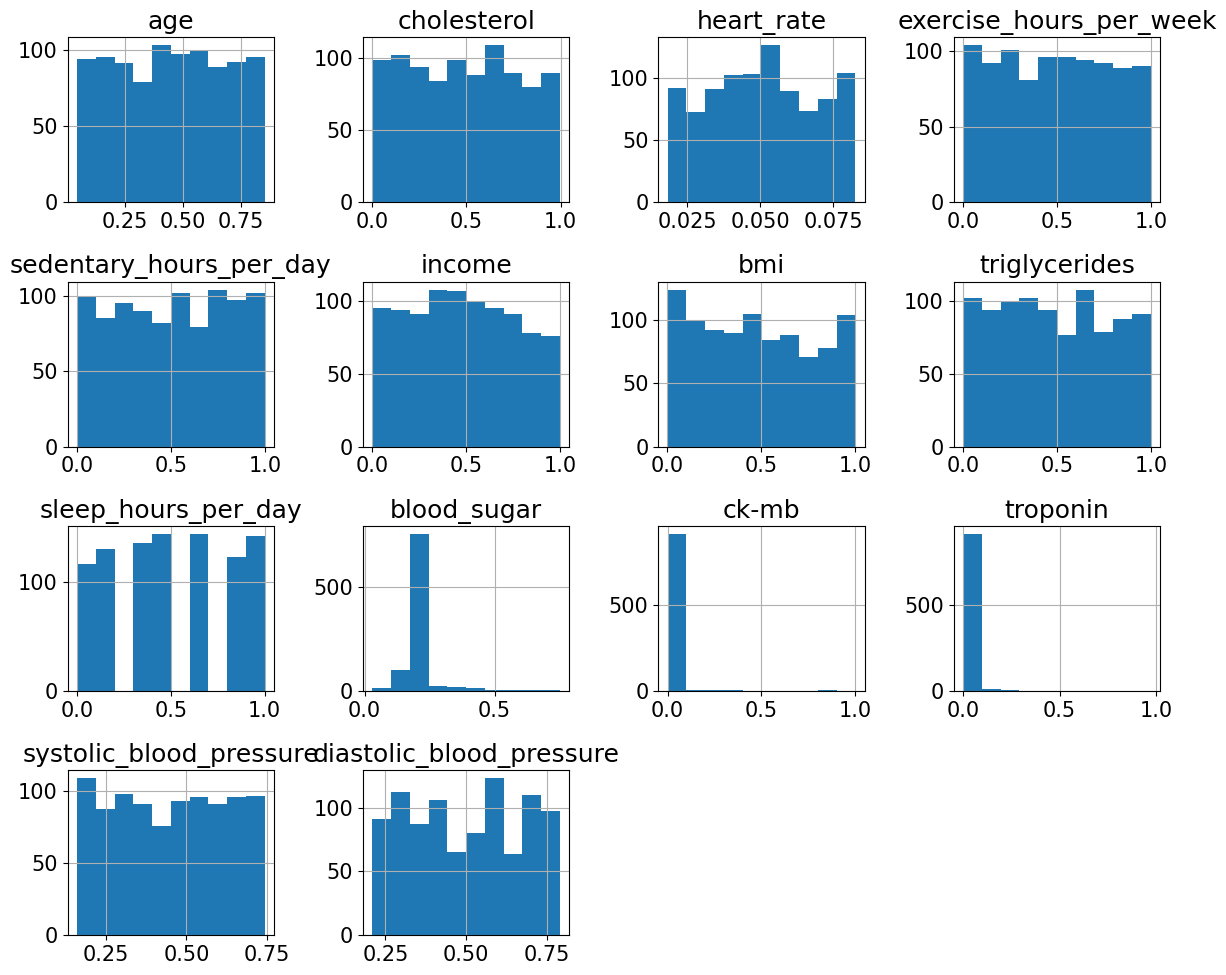

In [49]:
#изучим числовые признаки heart_test
numeric_cols = [
    'age',
    'cholesterol',
    'heart_rate',
    'exercise_hours_per_week',
    'sedentary_hours_per_day',
    'income', 
    'bmi',
    'triglycerides',
    'sleep_hours_per_day',
    'blood_sugar',
    'ck-mb',
    'troponin',
    'systolic_blood_pressure',
    'diastolic_blood_pressure'
]
heart_test[numeric_cols].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

Данные предоставленны в нормализованном виде и идентичны по структуре с heart_train.

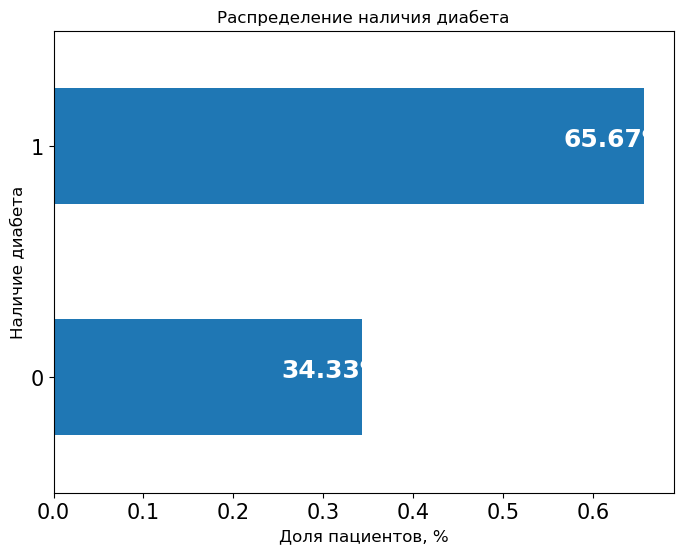

In [50]:
#изучим категориальные признаки heart_test

data = heart_test
column = 'diabetes'
title = 'Распределение наличия диабета'
xlabel = 'Доля пациентов, %'
ylabel = 'Наличие диабета'
diagram(data, column, title, xlabel, ylabel)

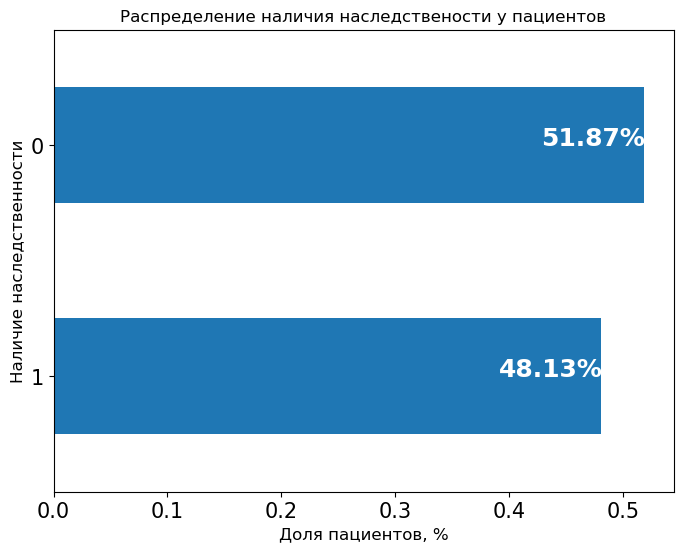

In [51]:
data = heart_test
column = 'family_history'
title = 'Распределение наличия наследствености у пациентов'
xlabel = 'Доля пациентов, %'
ylabel = 'Наличие наследственности'
diagram(data, column, title, xlabel, ylabel)

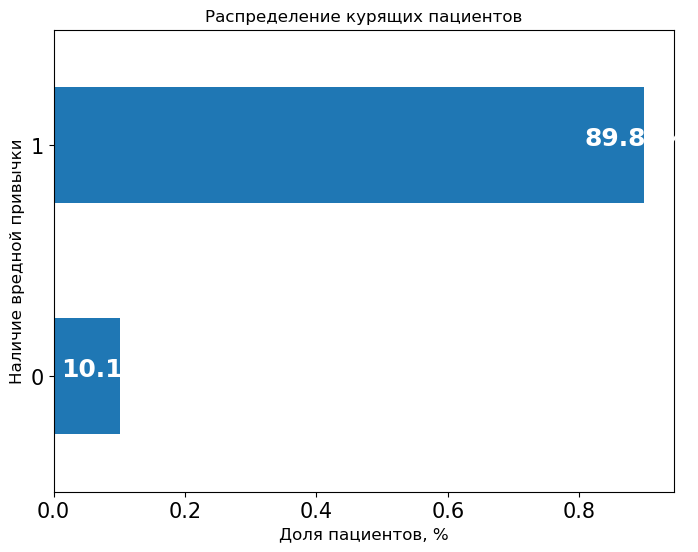

In [52]:
data = heart_test
column = 'smoking'
title = 'Распределение курящих пациентов'
xlabel = 'Доля пациентов, %'
ylabel = 'Наличие вредной привычки'
diagram(data, column, title, xlabel, ylabel)

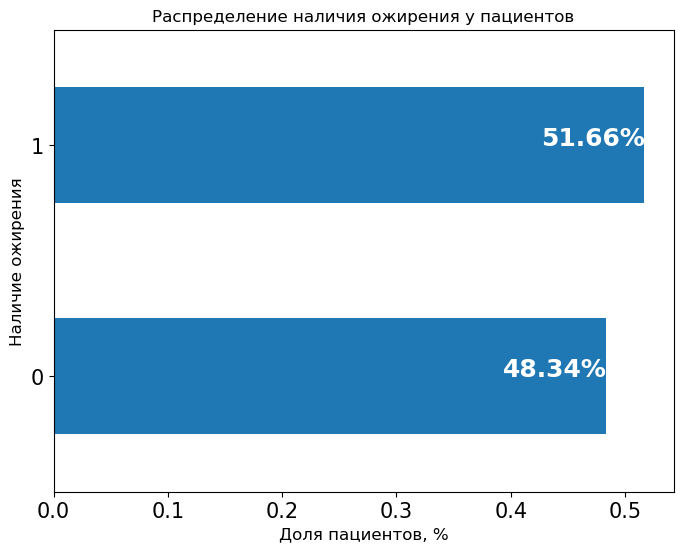

In [53]:
data = heart_test
column = 'obesity'
title = 'Распределение наличия ожирения у пациентов'
xlabel = 'Доля пациентов, %'
ylabel = 'Наличие ожирения'
diagram(data, column, title, xlabel, ylabel)

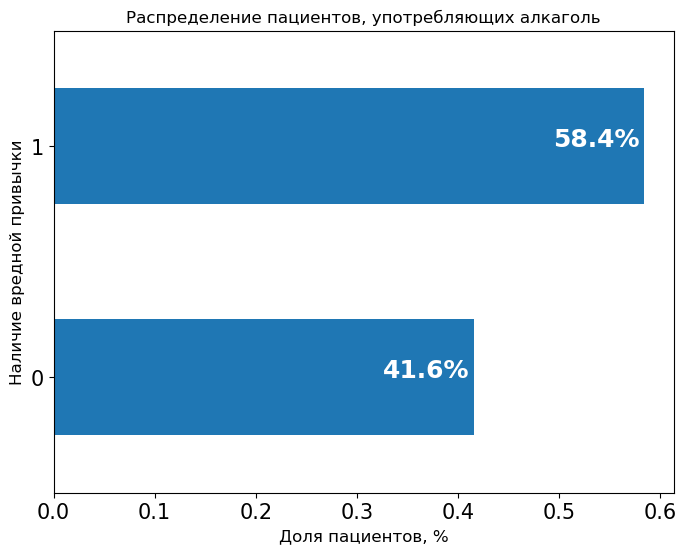

In [54]:
data = heart_test
column = 'alcohol_consumption'
title = 'Распределение пациентов, употребляющих алкаголь'
xlabel = 'Доля пациентов, %'
ylabel = 'Наличие вредной привычки'
diagram(data, column, title, xlabel, ylabel)

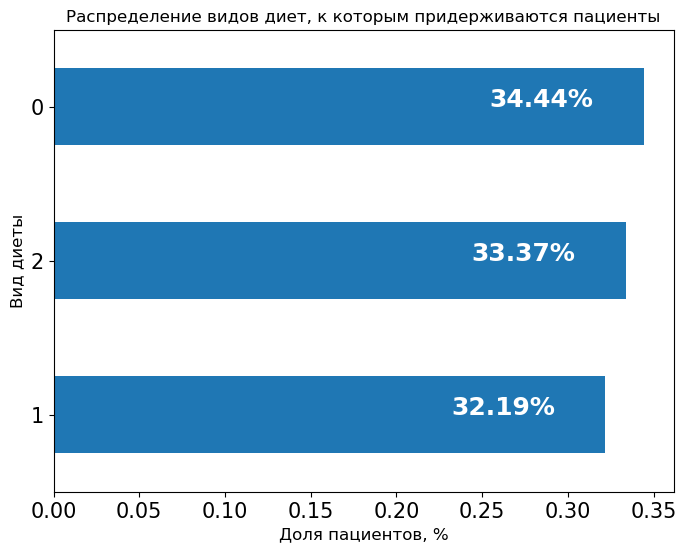

In [55]:
data = heart_test
column = 'diet'
title = 'Распределение видов диет, к которым придерживаются пациенты'
xlabel = 'Доля пациентов, %'
ylabel = 'Вид диеты'
diagram(data, column, title, xlabel, ylabel)

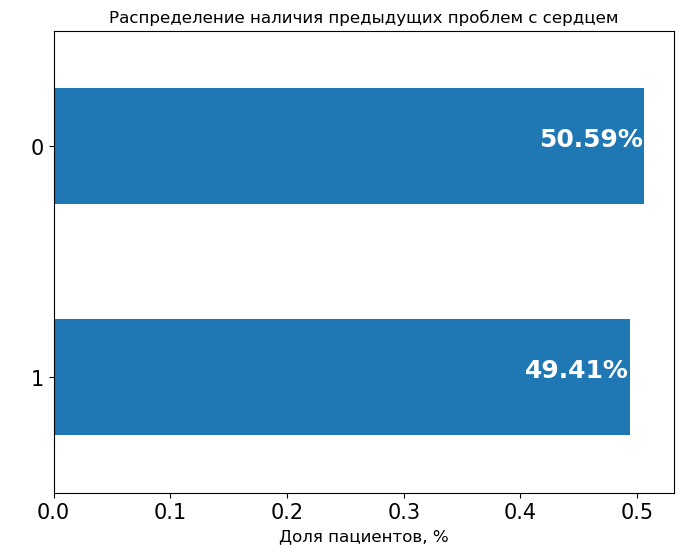

In [56]:
data = heart_test
column = 'previous_heart_problems'
title = 'Распределение наличия предыдущих проблем с сердцем'
xlabel = 'Доля пациентов, %'
ylabel = ' '
diagram(data, column, title, xlabel, ylabel)

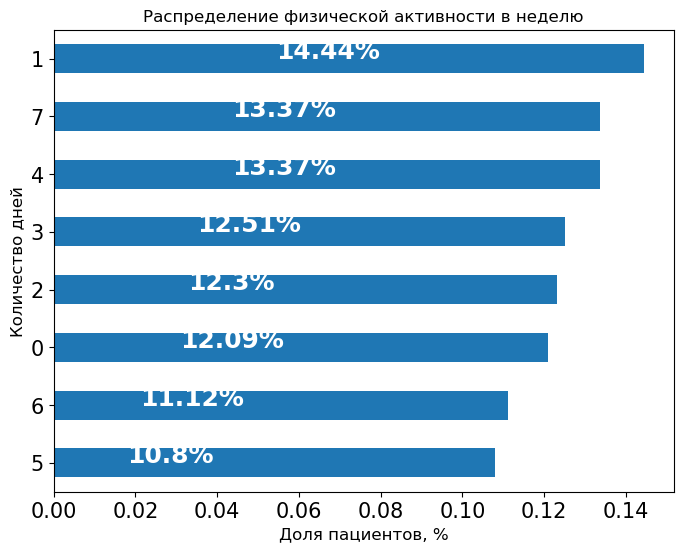

In [57]:
data = heart_test
column = 'physical_activity_days_per_week'
title = 'Распределение физической активности в неделю'
xlabel = 'Доля пациентов, %'
ylabel = 'Количество дней'
diagram(data, column, title, xlabel, ylabel)

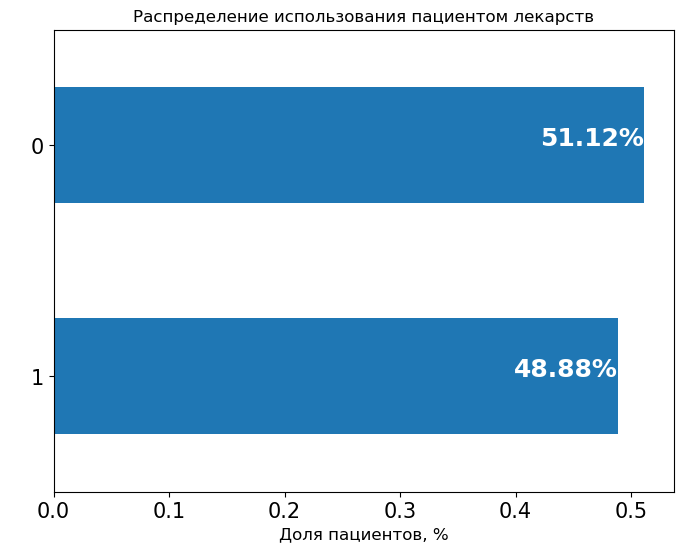

In [58]:
data = heart_test
column = 'medication_use'
title = 'Распределение использования пациентом лекарств'
xlabel = 'Доля пациентов, %'
ylabel = ' '
diagram(data, column, title, xlabel, ylabel)

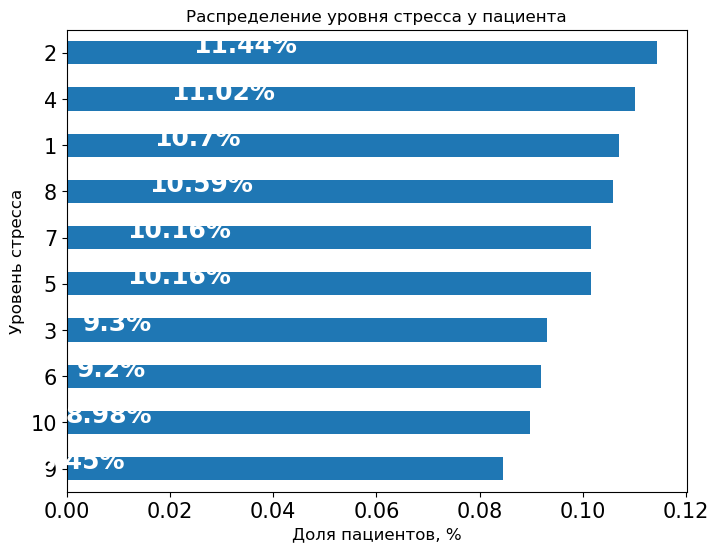

In [59]:
data = heart_test
column = 'stress_level'
title = 'Распределение уровня стресса у пациента'
xlabel = 'Доля пациентов, %'
ylabel = 'Уровень стресса'
diagram(data, column, title, xlabel, ylabel)

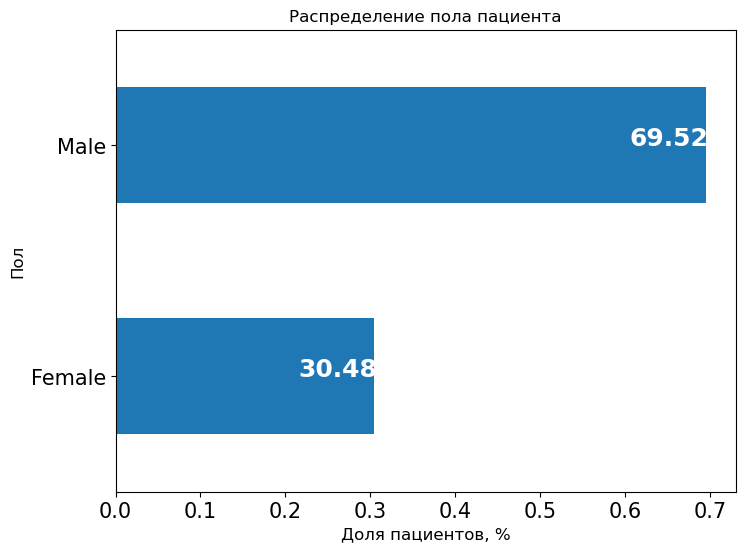

In [60]:
data = heart_test
column = 'gender'
title = 'Распределение пола пациента'
xlabel = 'Доля пациентов, %'
ylabel = 'Пол'
diagram(data, column, title, xlabel, ylabel)

Категориальные признаки распределены аналогично тех, которые находятся в предыдущем датасете.

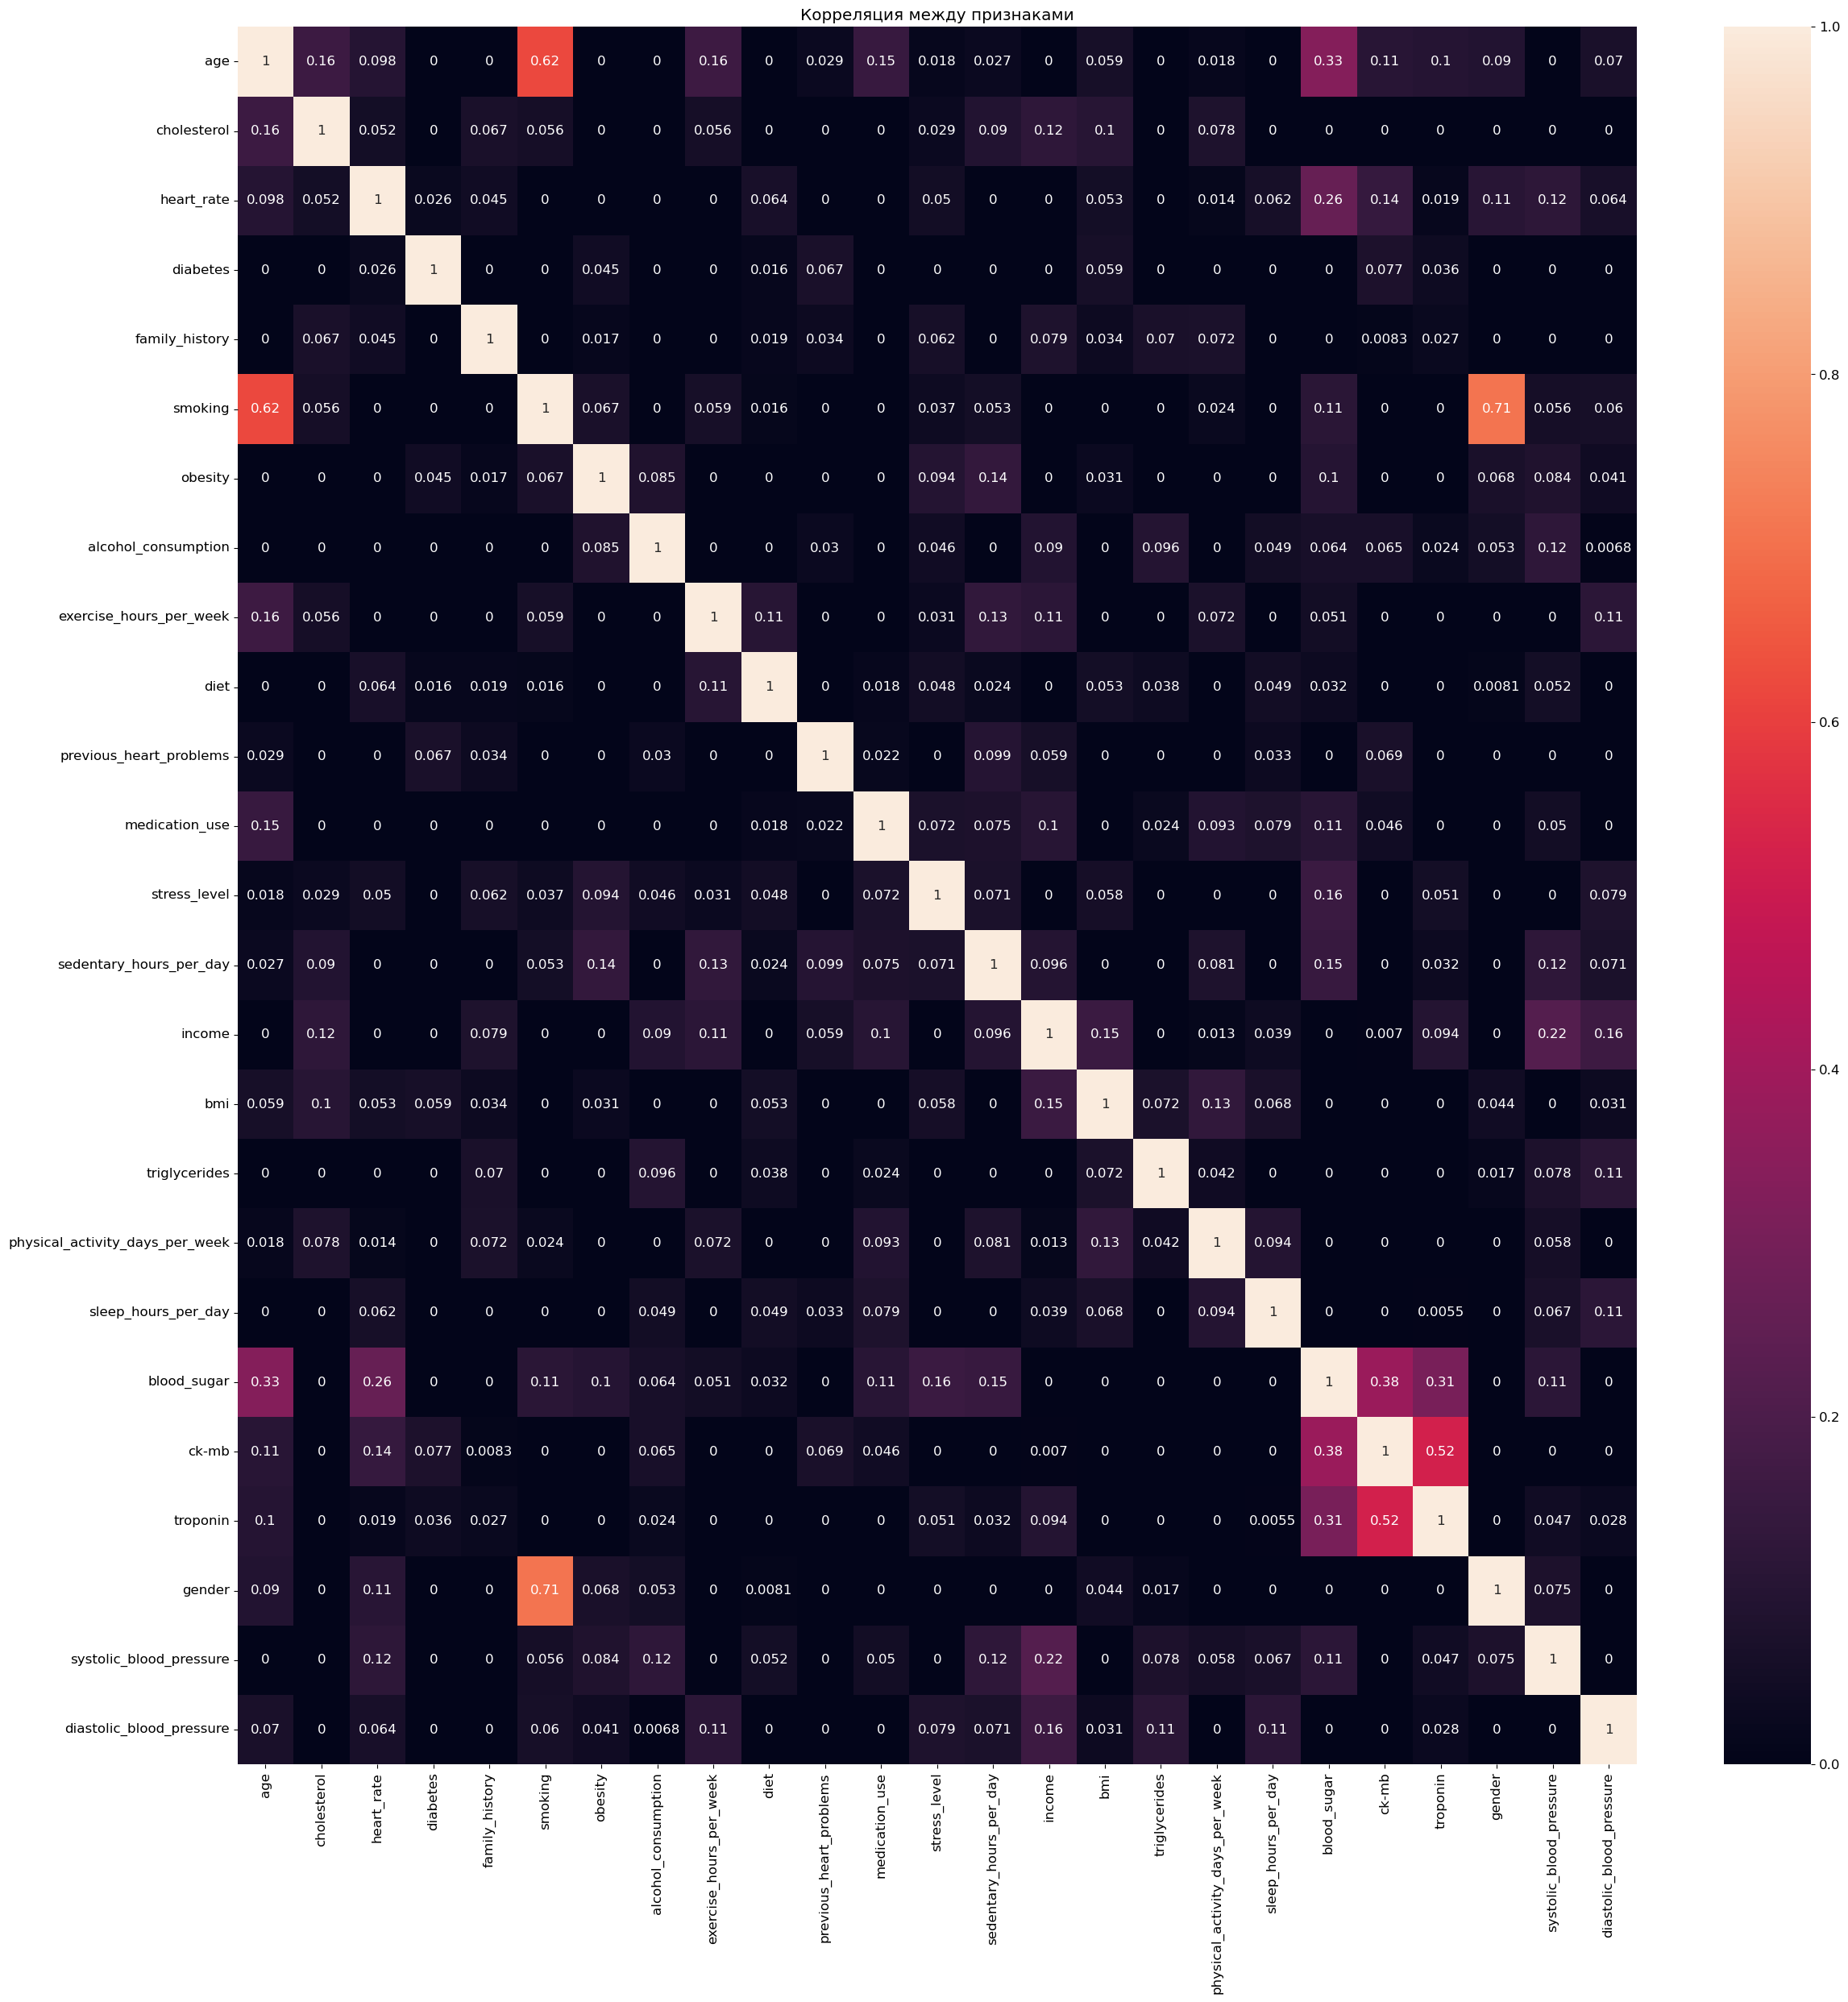

In [61]:
#построим кор. матрицу для heart_test

data = heart_test[heart_test.columns[heart_test.columns != 'id']]
all_features = list(data.columns)
corr = data[all_features].phik_matrix(interval_cols = [
     'age',
    'cholesterol',
    'heart_rate',
    'exercise_hours_per_week',
    'sedentary_hours_per_day',
    'income', 
    'bmi',
    'triglycerides',
    'sleep_hours_per_day',
    'blood_sugar',
    'ck-mb',
    'troponin',
    'systolic_blood_pressure',
    'diastolic_blood_pressure'
])

plt.figure(figsize=(28, 28))
plt.rc('font', size= 12)
chart = sns.heatmap(corr, annot=True,)
plt.title(r'Корреляция между признаками')
chart.set_xticklabels(chart.get_xticklabels())
chart.set_yticklabels(chart.get_xticklabels())
plt.show()

Тоже самое можно сказать и о кор. матрице. Но также стоит отметить, что присутсвует корреляция у сk-mb и тропонина.

Теперь нужно определить бесполезные признаки, а также утечки целевого признака.

id - технический идентификатор, не несёт информации для модели.

Дни активности. Признак почти дублирует `Exercise Hours Per Week` и `Sedentary Hours Per Day`. Лучше оставить количественные метрики.

Доход является косвенным фактором. Он не связан напрямую с возникновением сердечного приступа, но он служит показателем доступа к медицине. Все же доход слабо коррелирует с биологическими факторами риска.

Тип диеты влияет на состояние организма человека, при потреблении жирной некачественной пищи возрастает риск сердечных заболеваний. Но в данных признак не детализирован. Удалим его.

Прием лекарств. Лекарства не конкретизированы. Если они направлены на улучшения состояния пациента после перенесенных сердечных заболеваний, то все его показатели будут неактуальными.

Также исключим признаки с почти 0 корреляцией к остальным признакам: пол, использование медикаментов.

Удалим признак family_history, так как не понятно что он из себя представляет.

In [62]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8442 entries, 0 to 8684
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              8442 non-null   float64
 1   cholesterol                      8442 non-null   float64
 2   heart_rate                       8442 non-null   float64
 3   diabetes                         8442 non-null   int64  
 4   family_history                   8442 non-null   int64  
 5   smoking                          8442 non-null   int64  
 6   obesity                          8442 non-null   int64  
 7   alcohol_consumption              8442 non-null   int64  
 8   exercise_hours_per_week          8442 non-null   float64
 9   diet                             8442 non-null   int64  
 10  previous_heart_problems          8442 non-null   int64  
 11  medication_use                   8442 non-null   int64  
 12  stress_level             

In [63]:
bad_features = ['id', 'income', 'diet', 'physical_activity_days_per_week', 'medication_use', 'gender', 'family_history']

fix_heart_train = heart_train.drop(columns=bad_features).reset_index(drop=True)
fix_heart_test = heart_test.drop(columns=bad_features).reset_index(drop=True)

In [64]:
fix_heart_train.sample(20)

,age,cholesterol,heart_rate,diabetes,smoking,obesity,alcohol_consumption,exercise_hours_per_week,previous_heart_problems,stress_level,sedentary_hours_per_day,bmi,triglycerides,sleep_hours_per_day,heart_attack_risk_(binary),blood_sugar,ck-mb,troponin,systolic_blood_pressure,diastolic_blood_pressure
7841,0.247191,0.960714,0.080660,1,1,0,1,0.374306,1,5,0.590055,0.486651,0.194805,0.833333,1,0.227018,0.048229,0.036512,0.470968,0.348837
4384,0.258427,0.289286,0.032081,1,1,1,1,0.869110,1,4,0.103171,0.963200,0.337662,0.500000,0,0.227018,0.048229,0.036512,0.619355,0.662791
2155,0.606742,0.103571,0.066911,1,1,1,0,0.882857,0,7,0.328387,0.400887,0.175325,0.333333,0,0.227018,0.048229,0.036512,0.541935,0.523256
7306,0.157303,0.621429,0.064161,0,1,0,1,0.927888,1,4,0.308304,0.858926,0.516883,0.000000,0,0.227018,0.048229,0.036512,0.238710,0.720930
7612,0.528090,0.742857,0.059578,1,1,1,0,0.537289,0,2,0.242231,0.862968,0.089610,1.000000,0,0.156126,0.012610,0.001165,0.658065,0.383721
3534,0.696629,0.192857,0.070577,1,1,1,0,0.285807,0,10,0.710852,0.195496,0.594805,0.666667,1,0.227018,0.048229,0.036512,0.458065,0.395349
2545,0.269663,0.775000,0.043080,0,1,0,1,0.909969,0,6,0.977980,0.641375,0.287013,0.833333,0,0.227018,0.048229,0.036512,0.716129,0.418605
3422,0.561798,0.139286,0.056829,1,1,1,0,0.716413,1,4,0.583363,0.474844,0.132468,0.000000,0,0.083004,0.025891,0.001942,0.348387,0.709302
3453,0.741573,0.021429,0.072411,1,1,1,1,0.055898,0,7,0.156849,0.170969,0.596104,0.833333,0,0.227018,0.048229,0.036512,0.658065,0.732558
5600,0.831461,0.514286,0.040330,1,1,1,0,0.402715,0,6,0.690151,0.423644,0.353247,0.333333,0,0.227018,0.048229,0.036512,0.464516,0.360465


**Вывод:** Был проведен исследовательский и корреляционный анализ данных. Изучив все графики в тренировочном датасете можно сказать, что большинство категориальных признаков распределены одинаково. Однако, есть особенности:у большинства пациентов имеется диабет (65.2%). Подовляющее большинство пациентов курит. 60% употребляет алкоголь. Почти 70% пациентов - мужчины. Проанализировав матрицу можно сделать сказать, что самые сильные корреляции имеют возраст и сахар в крови. Также с сахаром в корви коррелирует пульс. Особенно сильные зависимости у возраста и курения, а также пола и курения. 

Аналогичные особенности имеет и тестовый датасет. Оба файла имеют идентичные двнные. 

Также были отобраны и удалены признаки, влияющие на ход исследоавния, а именно:
- `id`,
- `income`,
- `diet`,
- `physical_activity_days_per_week`,
- `medication_use`,
- `gender`,
- `family_history`.

# 4. Обучение модели

Принято решение использовать модель логистической регрессии из-за простоты интерпритации, быстроты обучения. 

In [143]:
fix_heart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8442 entries, 0 to 8441
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         8442 non-null   float64
 1   cholesterol                 8442 non-null   float64
 2   heart_rate                  8442 non-null   float64
 3   diabetes                    8442 non-null   int64  
 4   smoking                     8442 non-null   int64  
 5   obesity                     8442 non-null   int64  
 6   alcohol_consumption         8442 non-null   int64  
 7   exercise_hours_per_week     8442 non-null   float64
 8   previous_heart_problems     8442 non-null   int64  
 9   stress_level                8442 non-null   int64  
 10  sedentary_hours_per_day     8442 non-null   float64
 11  bmi                         8442 non-null   float64
 12  triglycerides               8442 non-null   float64
 13  sleep_hours_per_day         8442 

In [66]:
#выделим признаки 

numerical_features = [
    'age',
    'cholesterol', 
    'heart_rate',
    'exercise_hours_per_week',
    'stress_level',
    'sedentary_hours_per_day',
    'bmi',
    'triglycerides',
    'sleep_hours_per_day',
    'blood_sugar',
    'ck-mb',
    'troponin',
    'systolic_blood_pressure',
    'diastolic_blood_pressure'
]

In [67]:
categorical_features = [
    'diabetes',
    'smoking',
    'obesity',
    'alcohol_consumption',
    'previous_heart_problems'
]

In [68]:
#кодирование категориальных признаков

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_cat = encoder.fit_transform(fix_heart_train[categorical_features])

In [69]:
#масштабирование числовых признаков

scaler = StandardScaler()
X_num = scaler.fit_transform(fix_heart_train[numerical_features])

In [70]:
#разделим на выборки

X_processed = np.hstack([X_num, X_cat])
y = fix_heart_train['heart_attack_risk_(binary)']

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, 
    y, 
    test_size=0.2, 
    random_state=RANDOM_STATE,
    stratify=y
)

In [71]:
model = LogisticRegression(
    class_weight='balanced',  
    solver='liblinear',       
    random_state=RANDOM_STATE
)

In [72]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [73]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] 

# Метрики
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('\nROC-AUC Score:', roc_auc_score(y_test, y_proba))

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.52      0.57      1086
           1       0.36      0.49      0.41       603

    accuracy                           0.51      1689
   macro avg       0.50      0.50      0.49      1689
weighted avg       0.54      0.51      0.52      1689


ROC-AUC Score: 0.5172785550455213


Модель работает чуть лучше случайного угадывания Accuracy 0.51. Из всех предсказанных "не рисков" 64% верны. 
Для класса 1: лишь 36% предсказанных "рисков" действительно верны. Модель пропускает 51% реальных опасных случаев.

Попробуем подобрать порог в ручную.

In [78]:
def evaluate_threshold(threshold):
    y_pred = (y_proba >= threshold).astype(int)
    print(f"\nПорог: {threshold:.2f}")
    print(classification_report(y_test, y_pred))
    return y_pred

In [90]:
evaluate_threshold(0.477)


Порог: 0.48
              precision    recall  f1-score   support

           0       0.68      0.23      0.35      1086
           1       0.37      0.80      0.50       603

    accuracy                           0.44      1689
   macro avg       0.52      0.52      0.43      1689
weighted avg       0.57      0.44      0.40      1689



array([1, 1, 1, ..., 1, 1, 1])

In [110]:
final_threshold = 0.477  # Ваш подобранный порог
y_pred_final = (y_proba >= final_threshold).astype(int)

In [111]:
#рассчитаем метрики
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_final),
    'F1-score (class 1)': f1_score(y_test, y_pred_final, pos_label=1),
    'Precision (class 1)': precision_score(y_test, y_pred_final, pos_label=1),
    'Recall (class 1)': recall_score(y_test, y_pred_final, pos_label=1),
    'ROC AUC': roc_auc_score(y_test, y_proba)
}

In [112]:
print("\nОценка модели с порогом {:.3f}".format(final_threshold))
print("-"*40)
for name, value in metrics.items():
    print(f"{name:<20}: {value:.3f}")

print("\nПолный отчет:")
print(classification_report(y_test, y_pred_final))


Оценка модели с порогом 0.477
----------------------------------------
Accuracy            : 0.438
F1-score (class 1)  : 0.505
Precision (class 1) : 0.368
Recall (class 1)    : 0.803
ROC AUC             : 0.517

Полный отчет:
              precision    recall  f1-score   support

           0       0.68      0.23      0.35      1086
           1       0.37      0.80      0.50       603

    accuracy                           0.44      1689
   macro avg       0.52      0.52      0.43      1689
weighted avg       0.57      0.44      0.40      1689



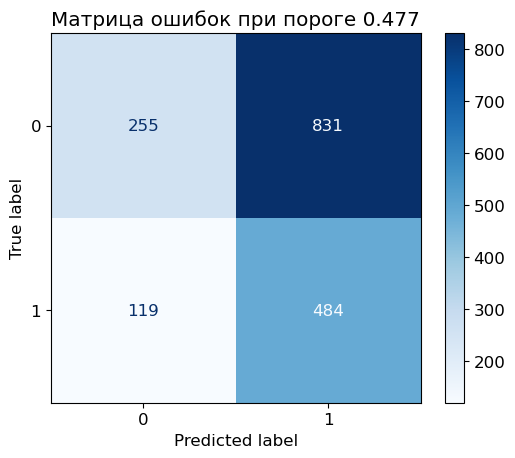

In [113]:
#матрица ошибок

cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.title(f'Матрица ошибок при пороге {final_threshold:.3f}')
plt.show()

Был найден в ручную порог для большего определения больных. Модель выявляет 80% случаев заболевания (recall 0.803). Но 63.2% - ложных тревог (precision (0.368). Подобные значения вызваны качеством данных. Удаление фичей, создание новых не привели к улучшению работоспосбности модели. Принято решение искусственно повысить выявление больных пациентов для "ручного" обследования.

В реально практике существование подобных результатов МО привели бы к перегрузу мед. системы отдельной клиники. Возможно, врачи могли бы начать игнорировать подобные предсказания и пропускать в том числе верно предсказанных пациентов.

Обучим модель на тестовых данных.

In [115]:
fix_heart_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       935 non-null    float64
 1   cholesterol               935 non-null    float64
 2   heart_rate                935 non-null    float64
 3   diabetes                  935 non-null    int64  
 4   smoking                   935 non-null    int64  
 5   obesity                   935 non-null    int64  
 6   alcohol_consumption       935 non-null    int64  
 7   exercise_hours_per_week   935 non-null    float64
 8   previous_heart_problems   935 non-null    int64  
 9   stress_level              935 non-null    int64  
 10  sedentary_hours_per_day   935 non-null    float64
 11  bmi                       935 non-null    float64
 12  triglycerides             935 non-null    float64
 13  sleep_hours_per_day       935 non-null    float64
 14  blood_suga

In [118]:
X_test_cat = encoder.transform(fix_heart_test[categorical_features])
X_test_num = scaler.transform(fix_heart_test[numerical_features])

In [119]:
X_test_processed = np.hstack([X_test_num, X_test_cat])

In [132]:
y_test_pred = model.predict(X_test_processed)
y_test_proba = model.predict_proba(X_test_processed)[:, 1]

In [127]:
#создадим таблицу с предсказанными данными 

results_data = pd.DataFrame({'id': heart_test['id'], 'prediction': y_test_pred})

In [140]:
results_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 935 entries, 0 to 965
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          935 non-null    int64
 1   prediction  935 non-null    int64
dtypes: int64(2)
memory usage: 21.9 KB


In [144]:
results_data.sample(20)

,id,prediction
332,8468,1
28,4301,0
608,474,1
862,8094,0
138,6560,0
227,5749,0
302,367,1
490,3772,0
362,1328,0
243,3370,0


In [145]:
results_data.to_csv(r'C:\Users\osnov\OneDrive\Рабочий стол\science\DATA SC\Проекты\Мастерская\heart_predictions.csv', index=False)

# Вывод

Была поставлена задача разработать модель для предсказания риска сердечного приступа, используя данные пациентов.

Для выполнения задачи предоставлены 2 файла. Были загружены два датасета: `heart_train` и `heart_test`.

Данные уже нормализованы. В тренировочном датасете целевой признак находится в столбце Heart Attack Risk (Binary).

Обнаружены пропуски в некоторых столбцах. 

Необходимо привести столбцы к единому формату во всех файлах. Типы данных имеют корректный вид, но выше упомянутые колонки вместе с Heart Attack Risk (Binary) следует привести к int64.

Был проведен исследовательский и корреляционный анализ данных. Изучив все графики в тренировочном датасете можно сказать, что большинство категориальных признаков распределены одинаково. Однако, есть особенности:у большинства пациентов имеется диабет (65.2%). Подавляющее большинство пациентов курит. 60% употребляет алкоголь. Почти 70% пациентов - мужчины. Проанализировав матрицу можно сделать сказать, что самые сильные корреляции имеют возраст и сахар в крови. Также с сахаром в корви коррелирует пульс. Особенно сильные зависимости у возраста и курения, а также пола и курения.

Аналогичные особенности имеет и тестовый датасет. Оба файла имеют идентичные данные.

Также были отобраны и удалены признаки, влияющие на ход исследования, а именно:
- `id`,
- `income`,
- `diet`,
- `physical_activity_days_per_week`,
- `medication_use`,
- `gender`,
- `family_history`.

Принято решение использовать модель логистической регрессии из-за простоты интерпритации, быстроты обучения. 

Модель, обученная на тренировочных данных, работает чуть лучше случайного угадывания. Accuracy 0.51. Из всех предсказанных "не рисков" 64% верны.
Для класса 1: лишь 36% предсказанных "рисков" действительно верны. Модель пропускает 51% реальных опасных случаев.

Был найден в ручную порог для большего определения больных. Модель выявляет 80% случаев заболевания (recall 0.803). Но 63.2% - ложных тревог (precision (0.368). Подобные значения вызваны качеством данных. Удаление фичей, создание новых не привели к улучшению работоспособности модели. Принято решение искусственно повысить выявление больных пациентов для "ручного" обследования.

В реально практике существование подобных результатов МО привели бы к перегрузу мед. системы отдельной клиники. Возможно, врачи могли бы начать игнорировать подобные предсказания и пропускать в том числе верно предсказанных пациентов.

После чего модель была обучена на тестовых данных. Результаты поместили в отдельную таблицу в формате `id`, `pdrediction`.

Для большей точности и последующих улучшений модели необходимо предоставить больше данных, а также их расшифровку.

Также желательно упомянуть манипуляции, которые были проведены над признаками. Либо их постовлять в привычном виде. Например в колонках с информацией о возрасте, диете и тп. 